In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
from matplotlib.patches import Rectangle
import seaborn as sns


In [327]:
# import survey data 

data = pd.read_csv('DataSim.csv')

In [5]:
# This is the initial exploratory data analysis I did after our team got back the survey results.
# After importing the survey data, I plotted descriptive graphs in three steps: 
# 1) DEMOGRAPHICS (Q2-6): organization type, position, years of experience, region and professional domain 
# 2) DATA ANALYTICS (Q9-13): current use, issues and improvement criteria for data analytics tools 
# 3) SIMULATION (Q15-19): current use, issues and improvement criteria for simulation tools 

# Demographics

### Q2. Organization

In [62]:
# count
a = data["Q2"].value_counts()
a

Private    319
Public     129
Name: Q2, dtype: int64

([<matplotlib.axis.XTick at 0x1a2e0db780>,
 <a list of 2 Text xticklabel objects>)

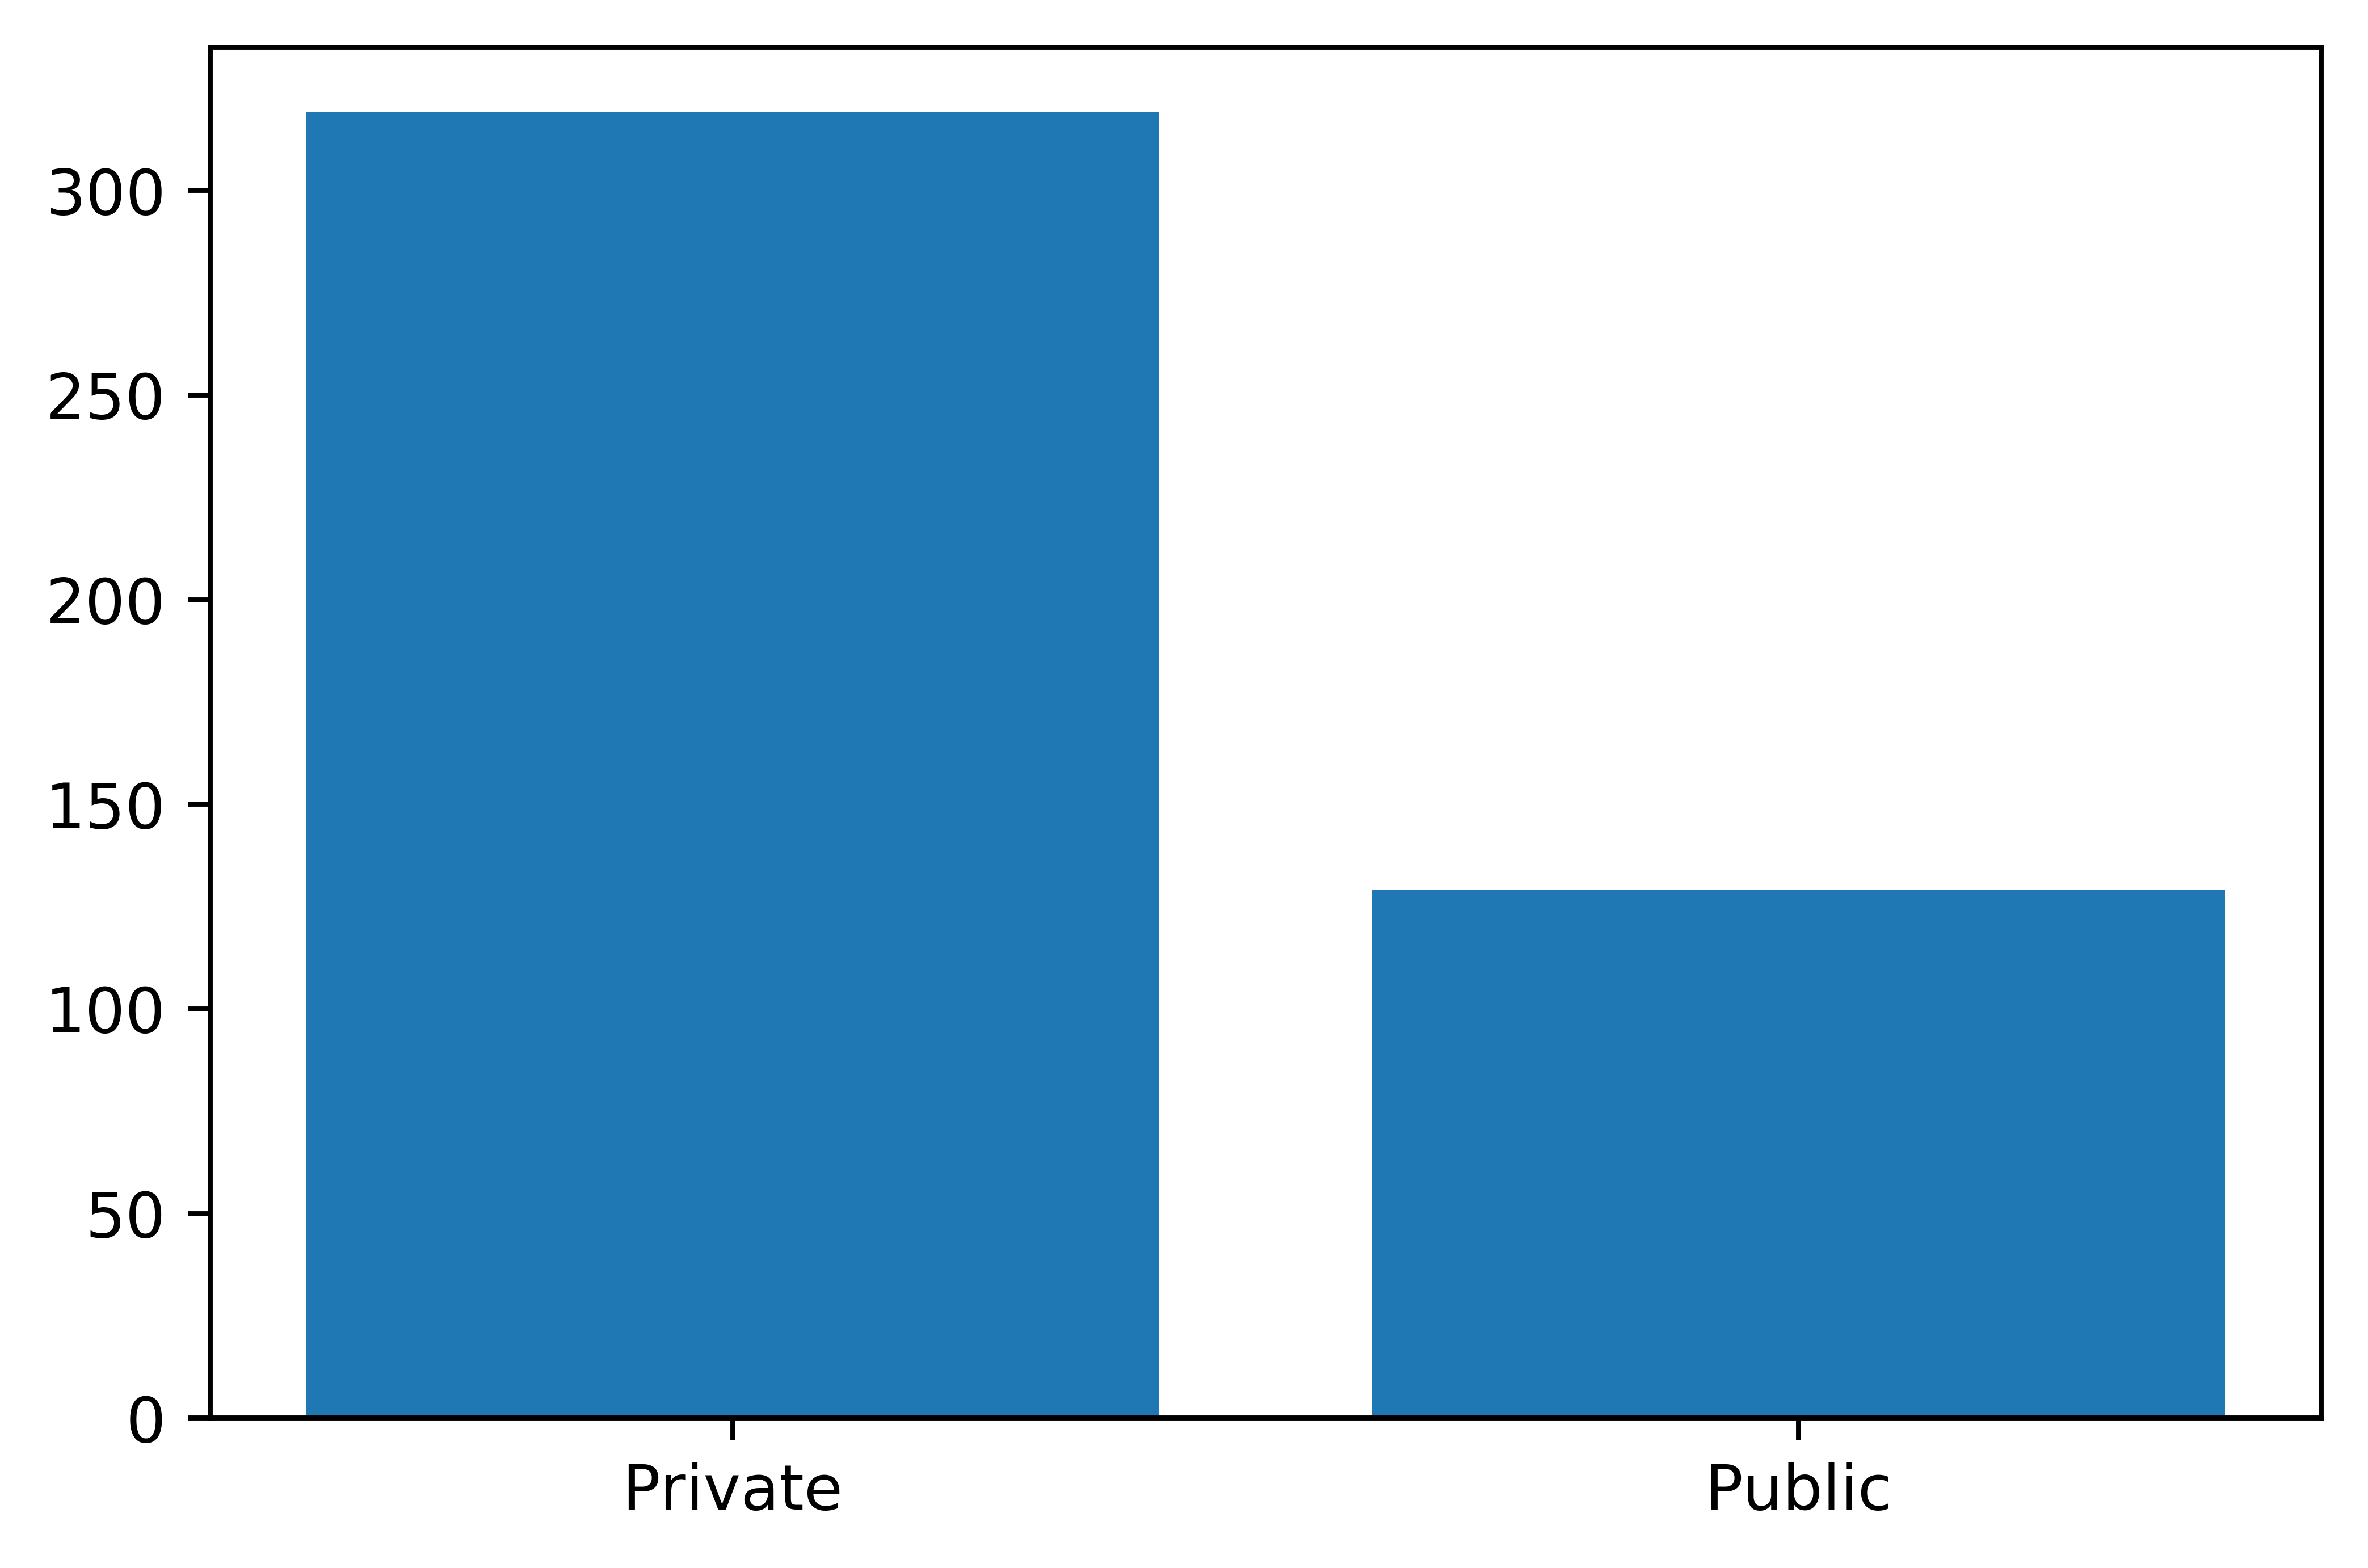

In [63]:
# plot org data 

plt.figure(dpi = 800)
plt.bar(np.arange(0,2), a)
plt.xticks([0, 1], ["Private", "Public"])

### Q3. Position 

In [333]:
data["Q3"] = data["Q3"].map(str.strip)
b = data["Q3"].value_counts()
print(b)


Engineer     221
Manager      118
Director      78
President     27
Principal      4
Name: Q3, dtype: int64


([<matplotlib.axis.XTick at 0x1a1d4632b0>,
 <a list of 5 Text xticklabel objects>)

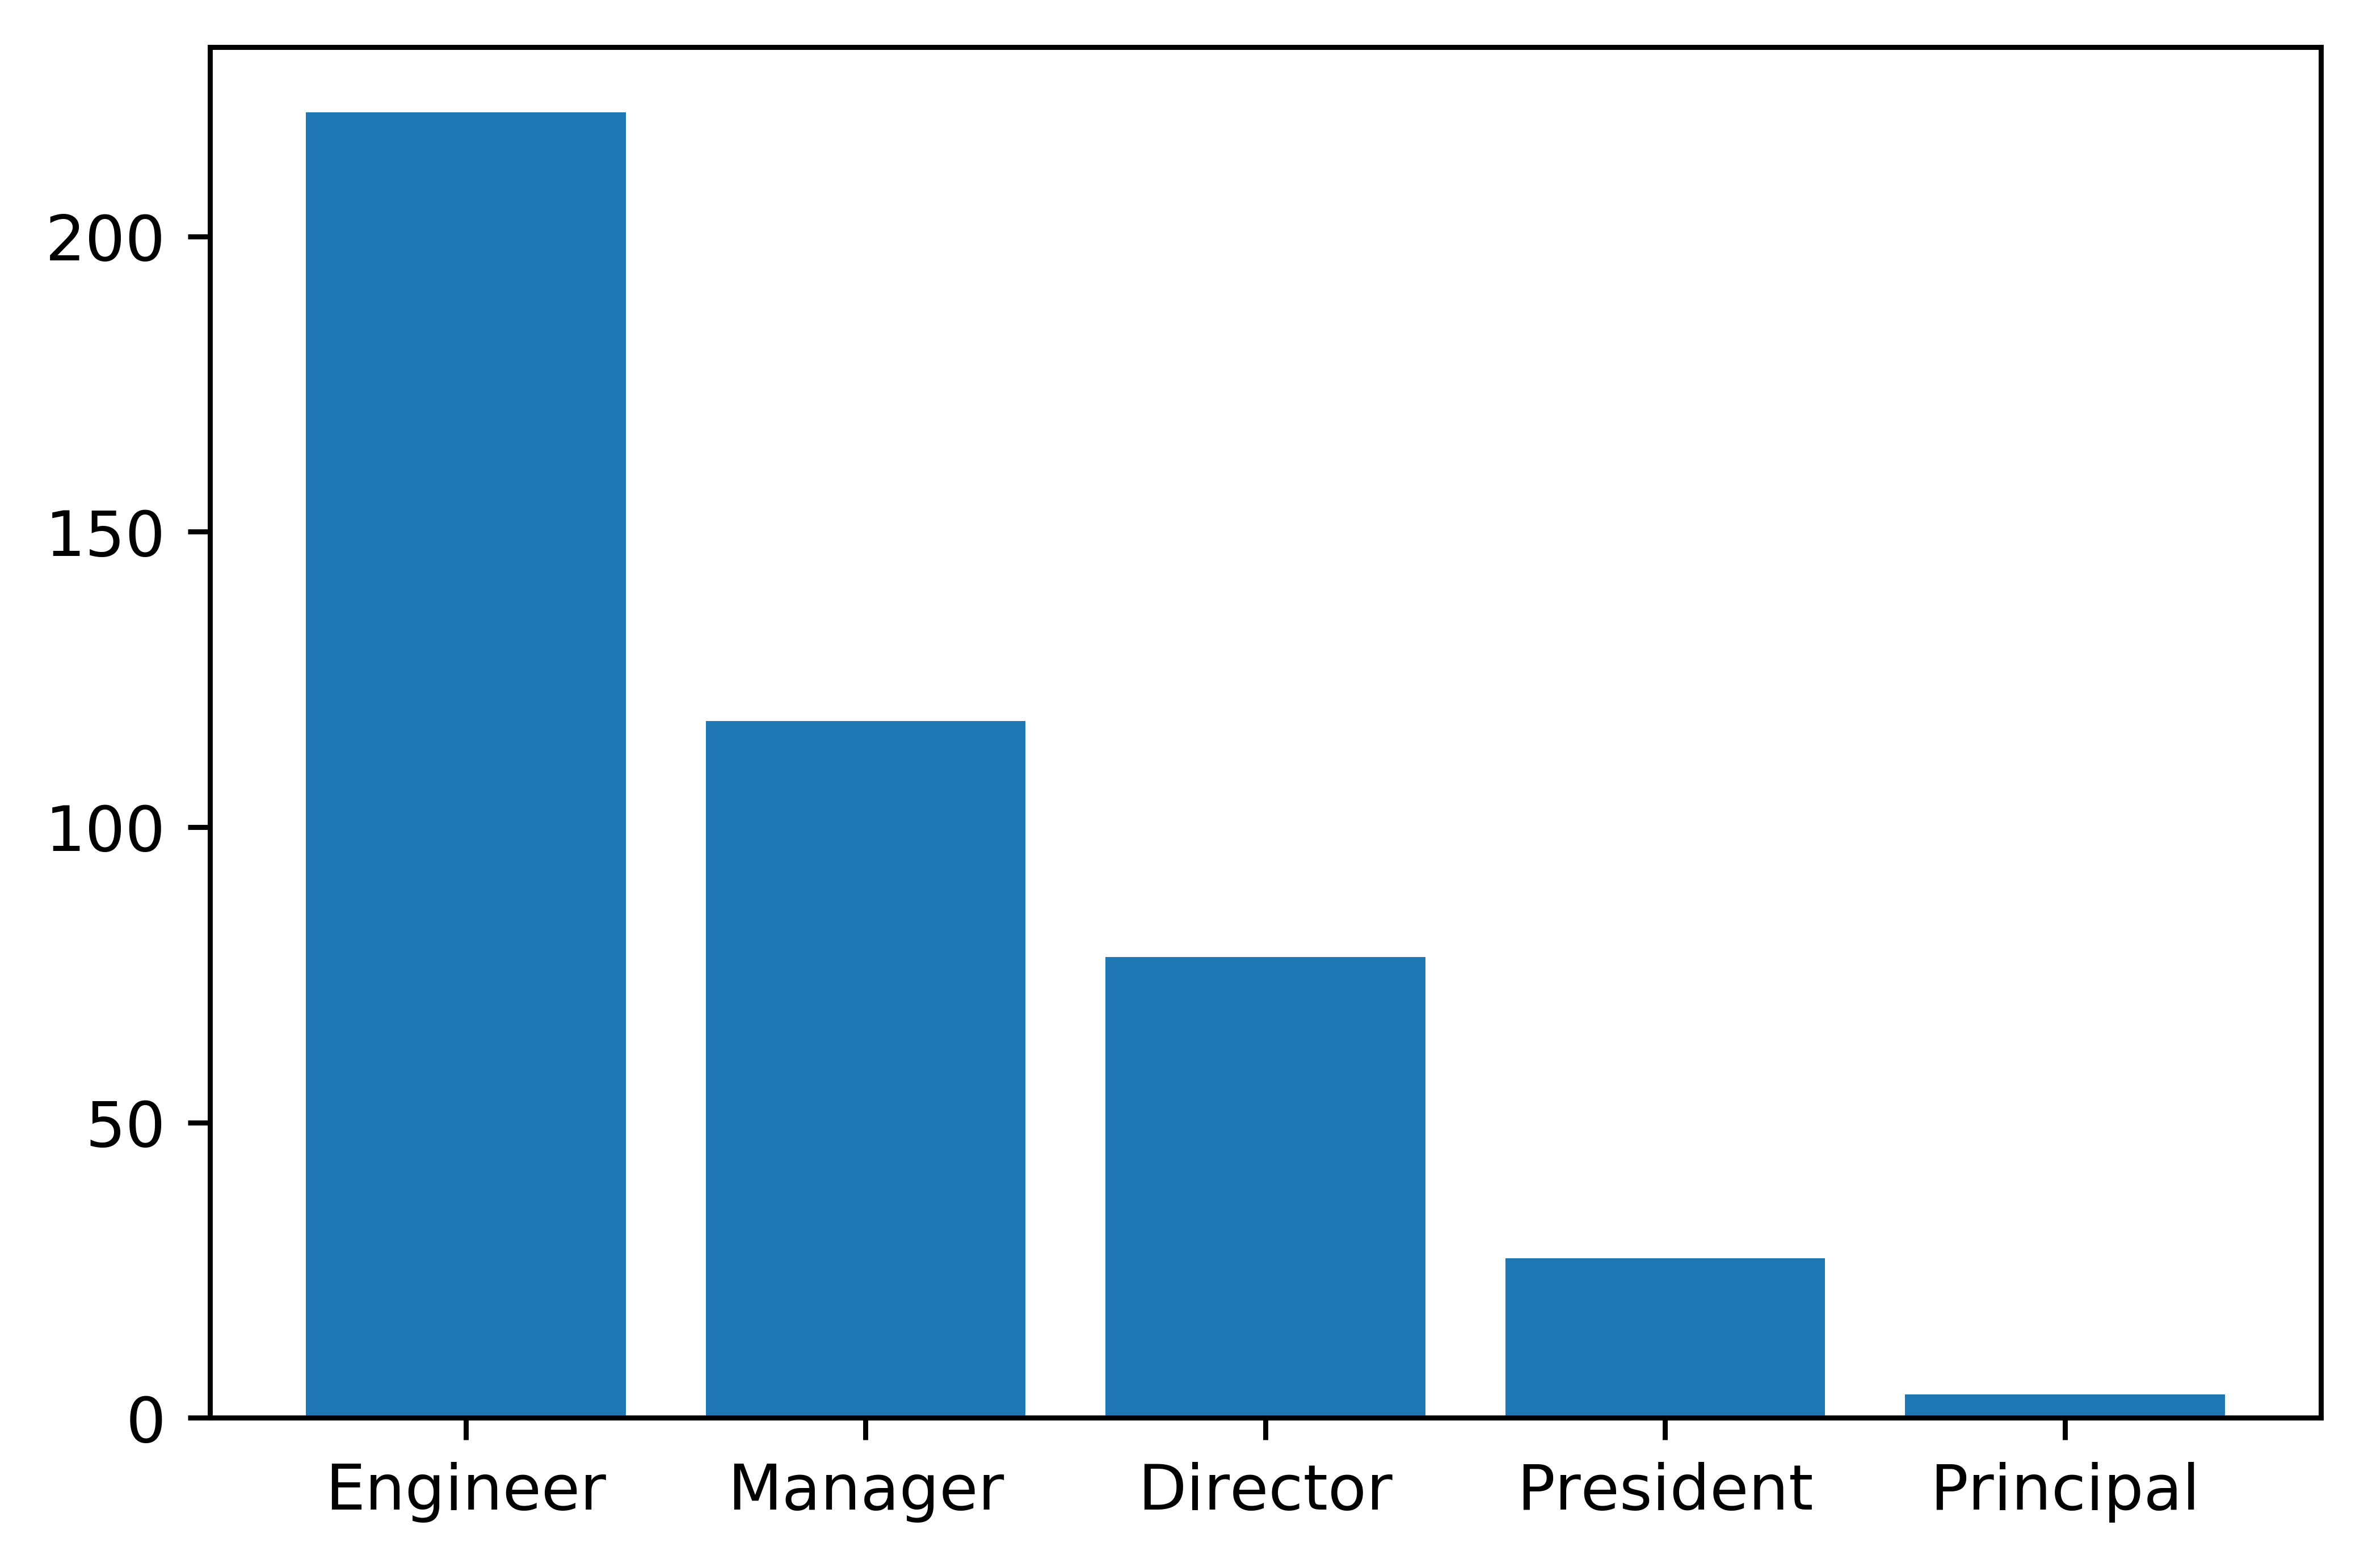

In [323]:
# cleaning up data 

d = [1,2,3,4,5]


# plot positions 

plt.figure(dpi = 800)
plt.bar(d,b)

plt.xticks([1,2,3,4,5], ['Engineer', 'Manager', 'Director', 'President', 'Principal'])



### Q4. Experience 

In [328]:
c = data["Q4"].value_counts()
c


20+         167
10 to 20    114
5 to 10     111
1 to 5       56
Name: Q4, dtype: int64

([<matplotlib.axis.XTick at 0x1a1ce86080>,
 <a list of 4 Text xticklabel objects>)

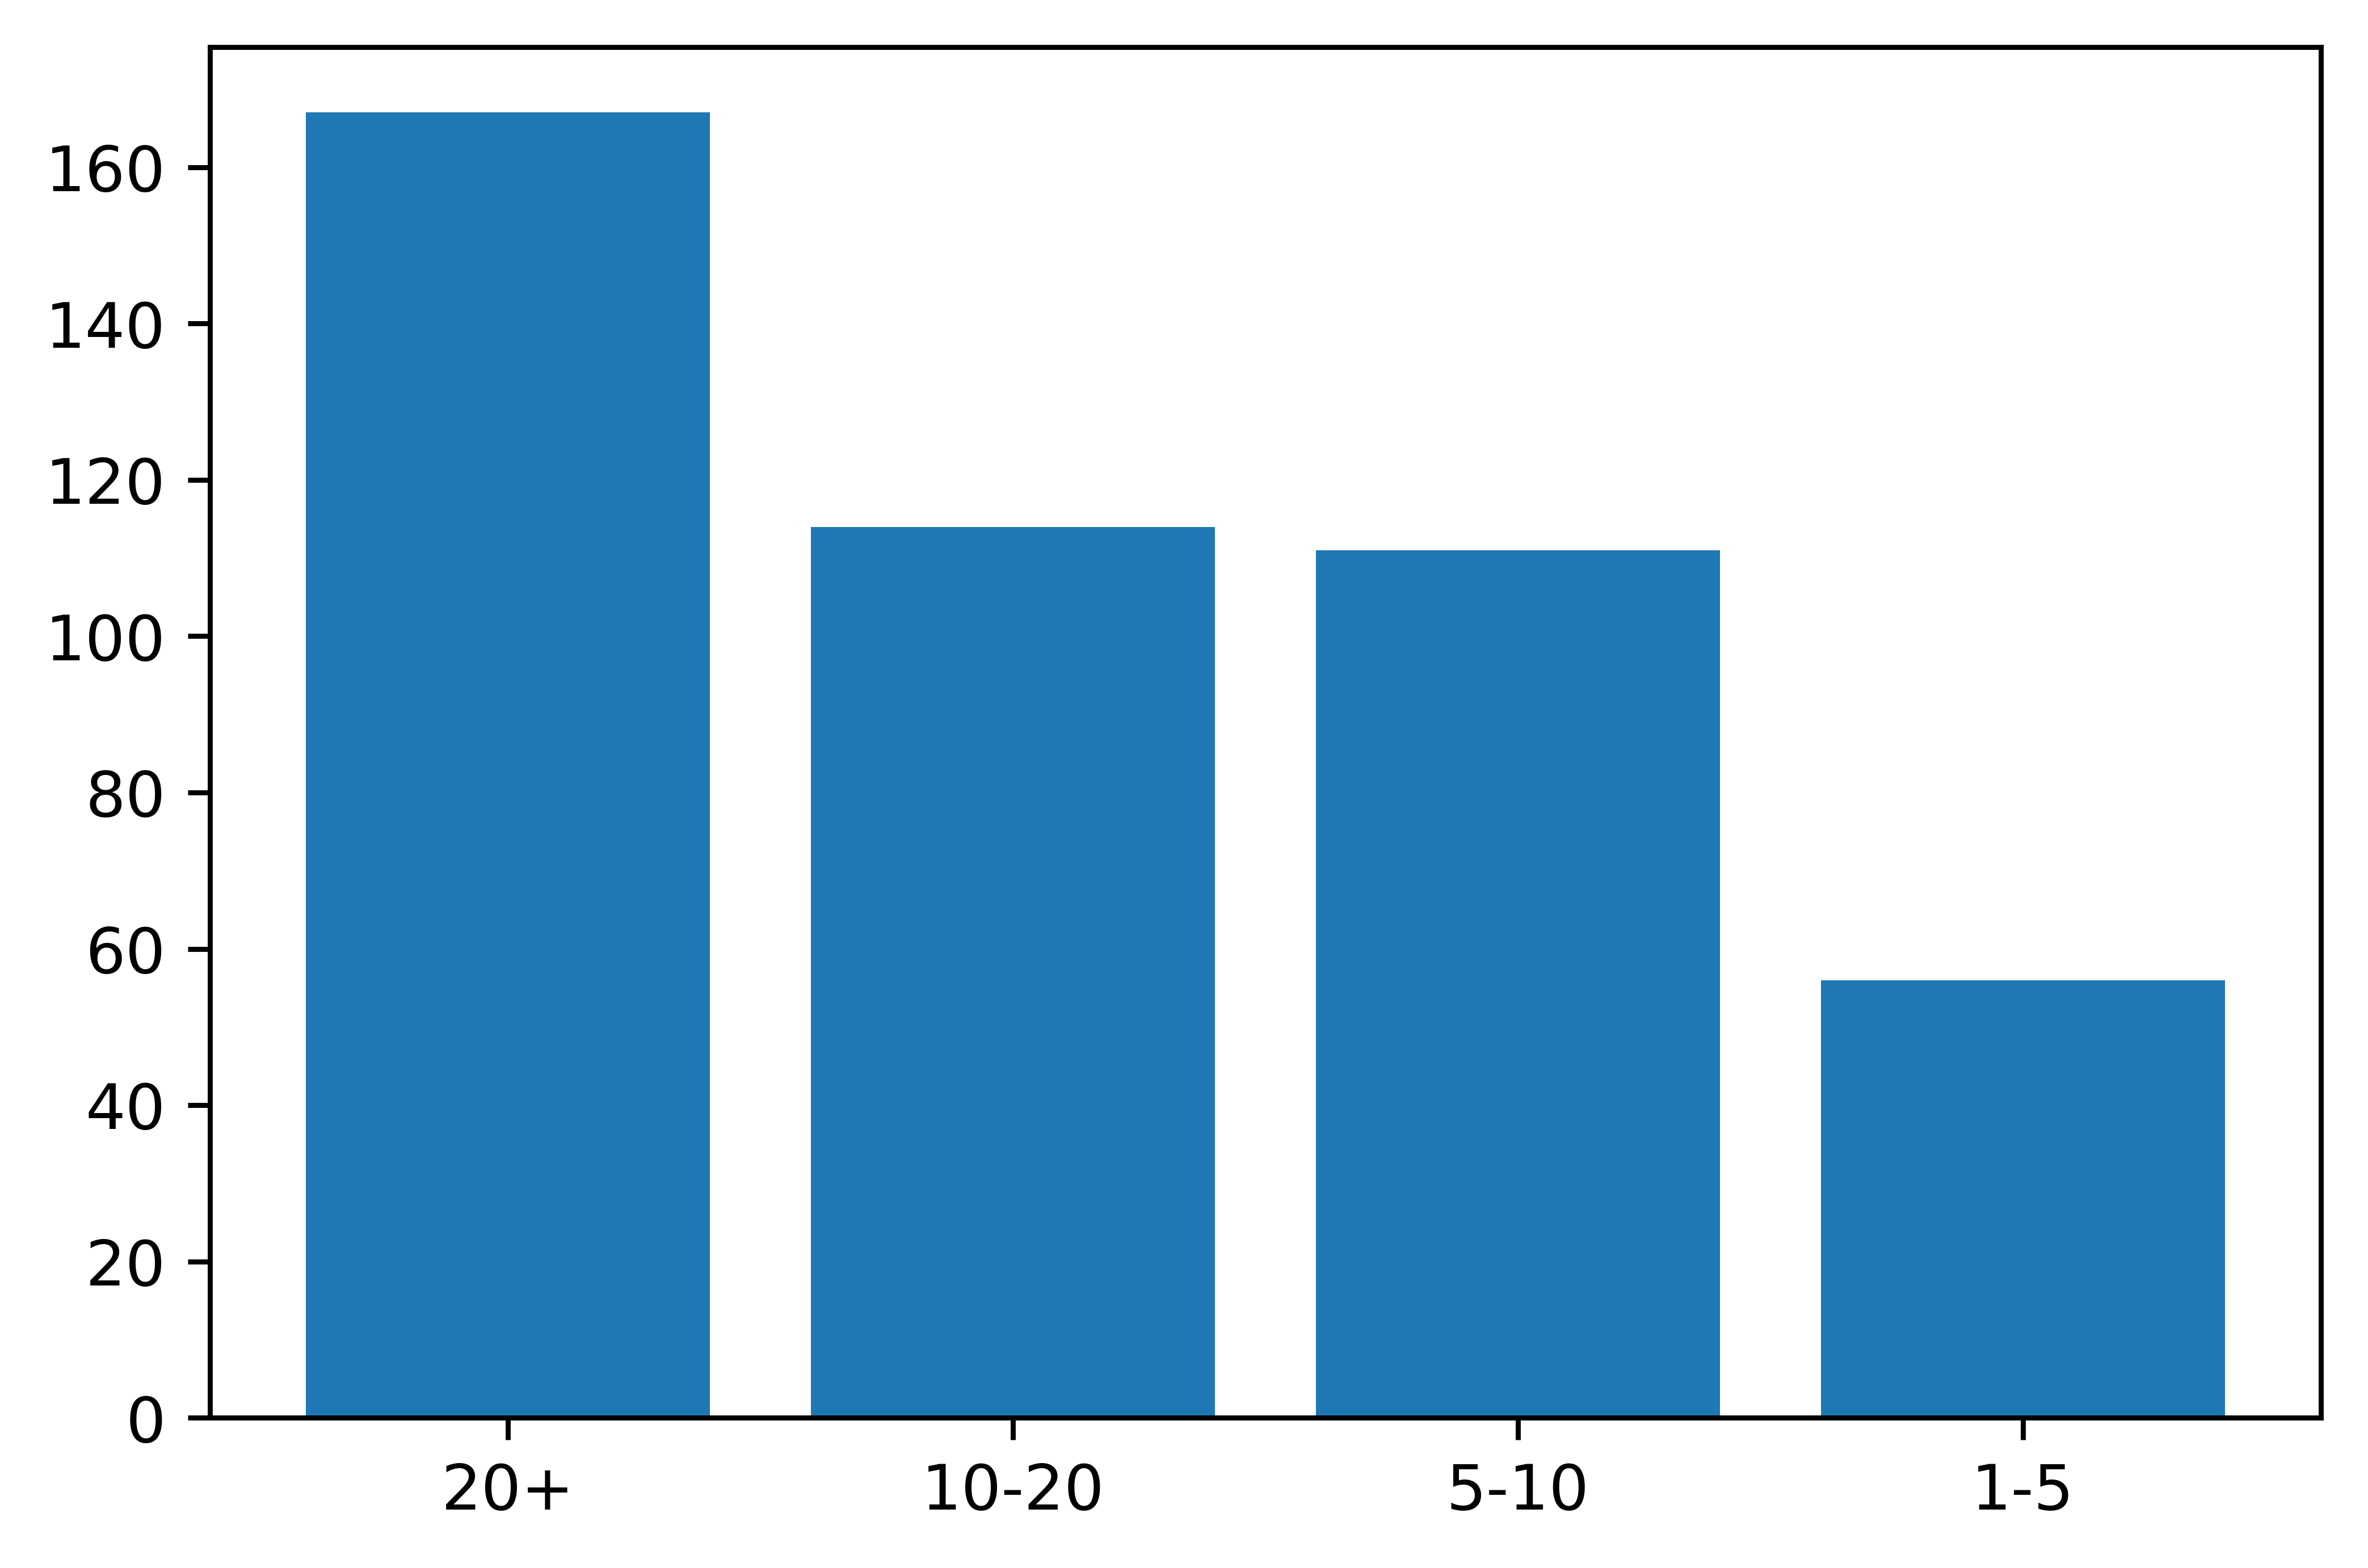

In [329]:
# plot years of experience 

plt.figure(dpi = 800)
plt.bar(np.arange(0,4), c)
plt.xticks([0, 1, 2, 3], ["20+", "10-20", "5-10", "1-5"])

### Q5. Region

In [24]:
d = data["Q5"].value_counts()
d

Northeast    133
West         127
Midwest       96
South         92
Name: Q5, dtype: int64

([<matplotlib.axis.XTick at 0x11195e860>,
 <a list of 4 Text xticklabel objects>)

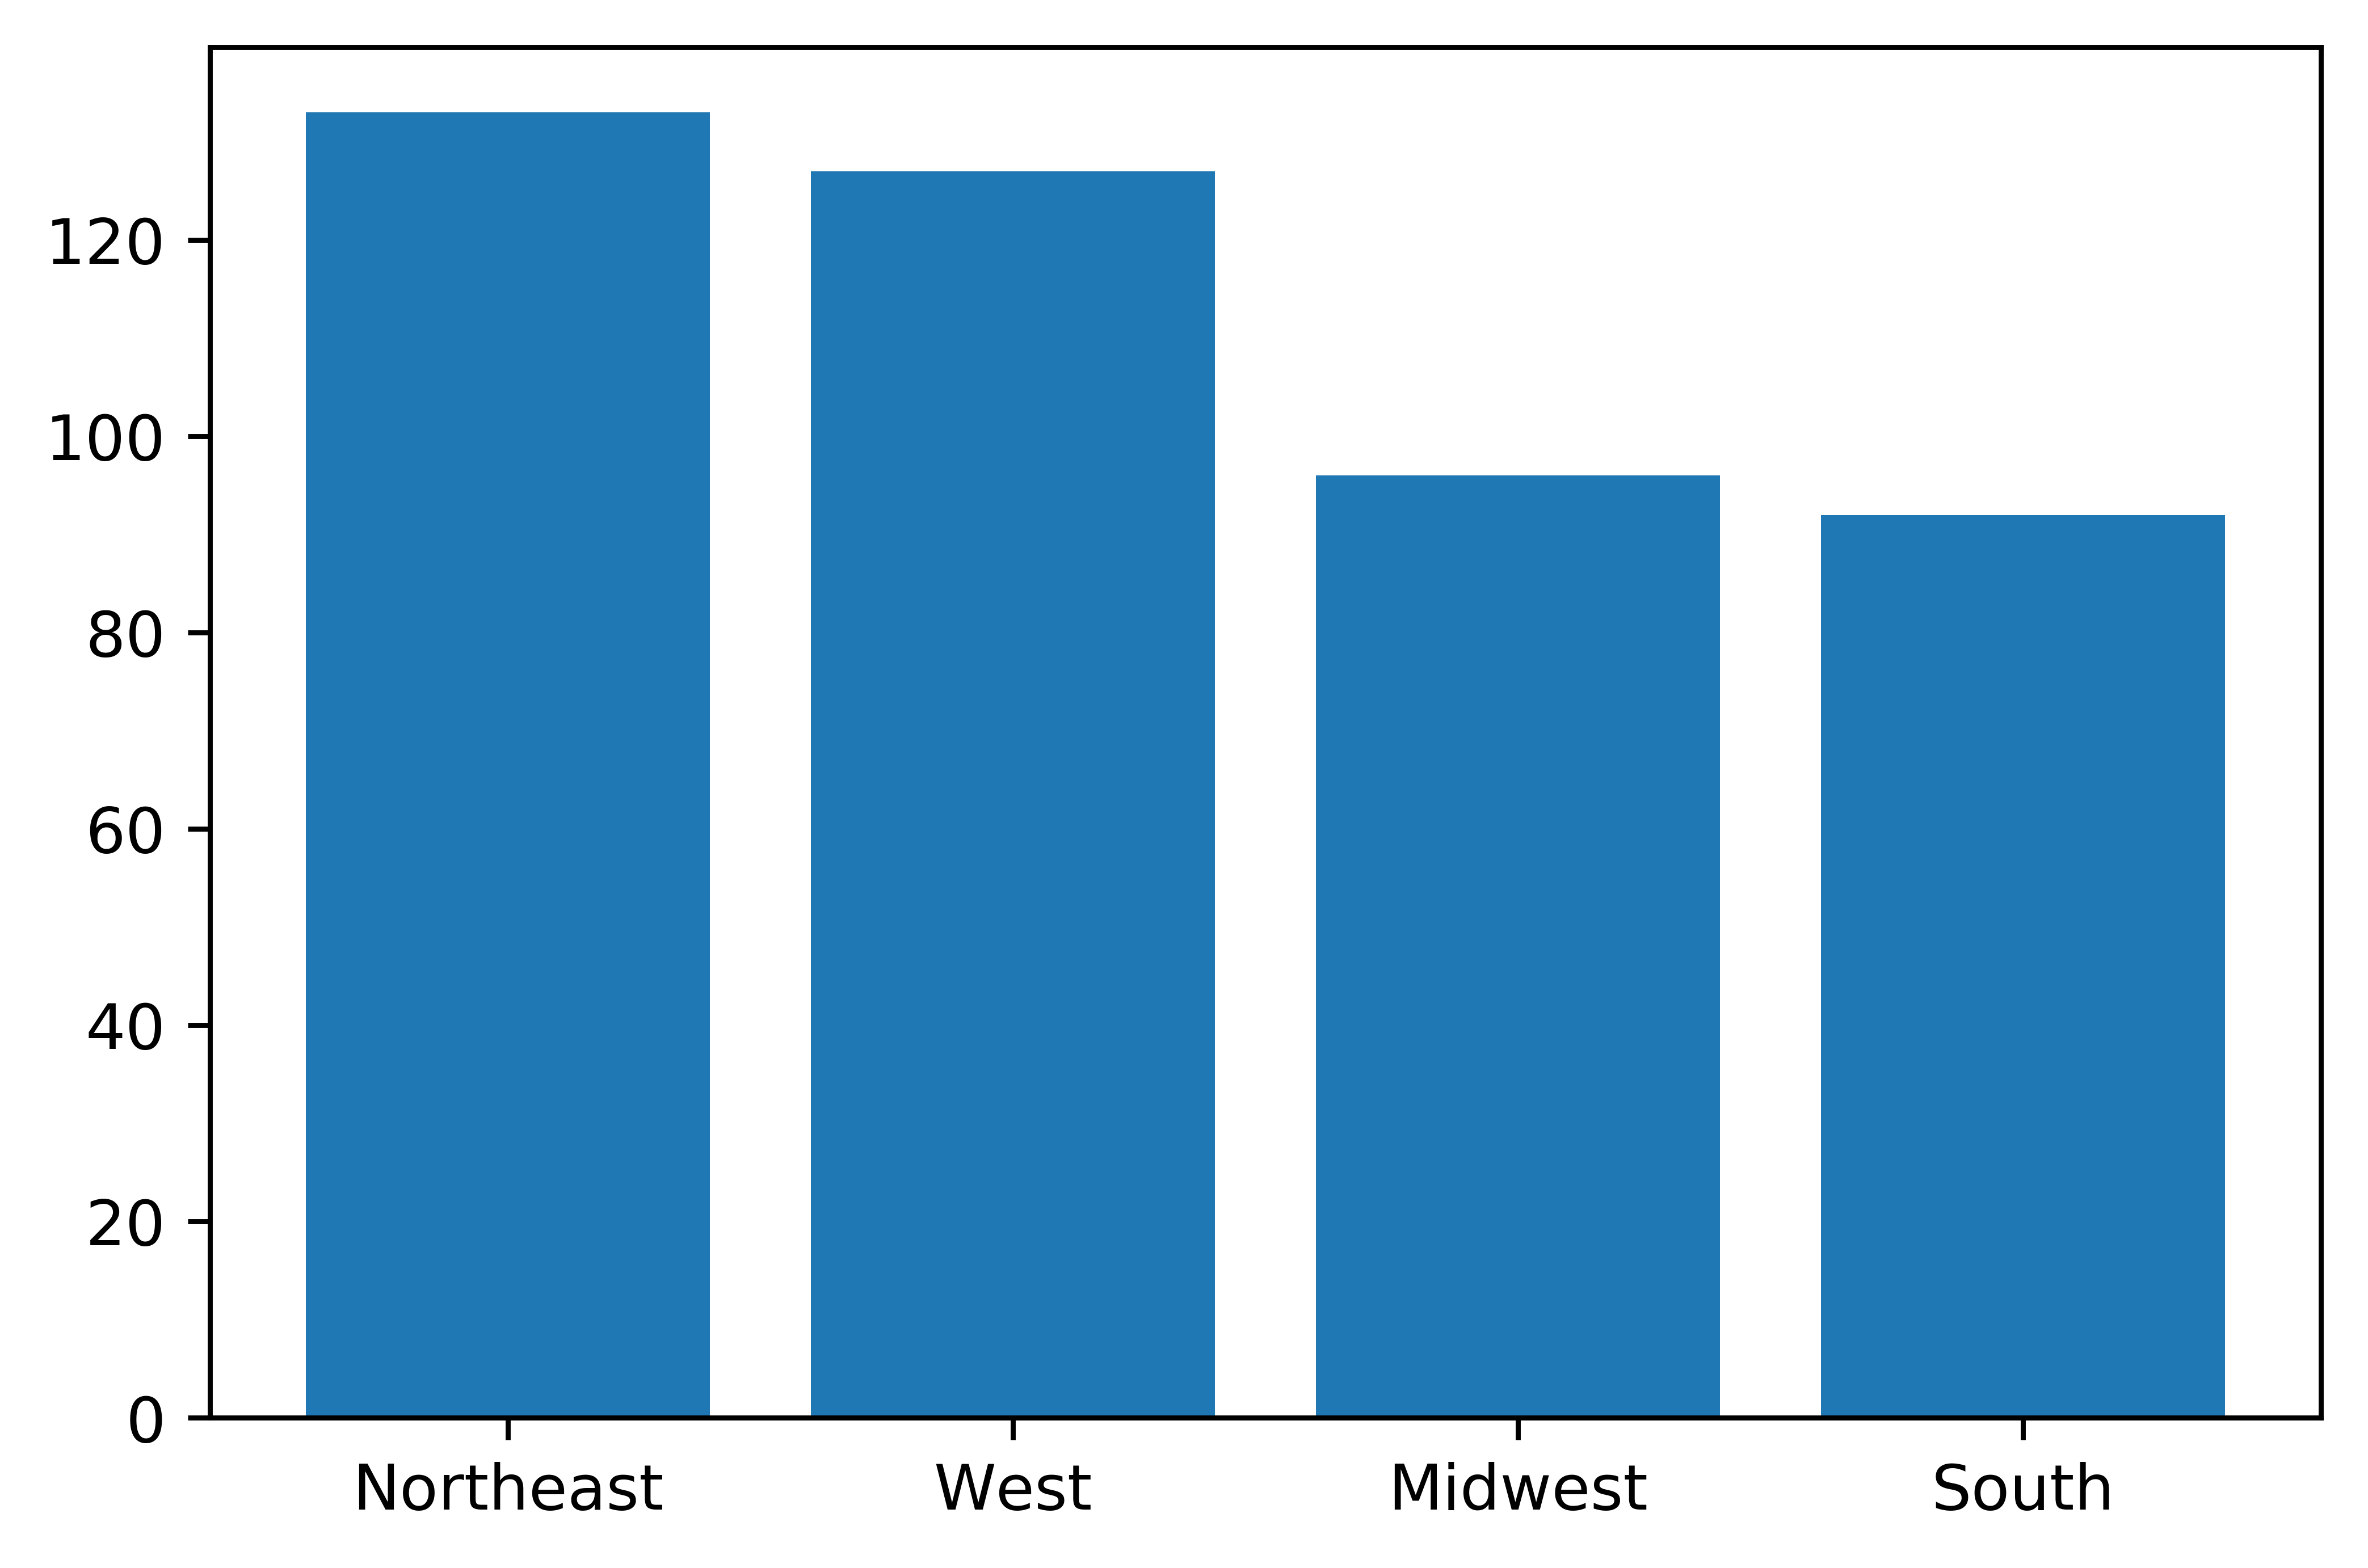

In [25]:
# plot regions

plt.figure(dpi = 800)
plt.bar(np.arange(0,4), d)
plt.xticks([0, 1, 2, 3], ["Northeast", "West", "Midwest", "South"])

### Q6. Professional Domain

#### domain use 

df6 = pd.DataFrame()
df6["1"] = data["Q6.12"].value_counts()
df6["2"] = data["Q6.13"].value_counts()
df6["3"] = data["Q6.8"].value_counts()
df6["4"] = data["Q6.4"].value_counts()
df6["5"] = data["Q6.14"].value_counts()
df6["6"] = data["Q6.11"].value_counts()
df6["7"] = data["Q6.10"].value_counts()
df6["8"] = data["Q6.2"].value_counts()
df6["9"] = data["Q6.7"].value_counts()
df6["10"] = data["Q6.1"].value_counts()
df6["11"] = data["Q6.9"].value_counts()
df6["12"] = data["Q6.6"].value_counts()
df6["13"] = data["Q6.5"].value_counts()
df6["14"] = data["Q6.3"].value_counts()


In [141]:
df6

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,423,366,356,350,347,331,318,285,218,206,185,94,98,70
1,25,82,92,98,101,117,130,163,230,242,263,344,350,378


<Container object of 14 artists>

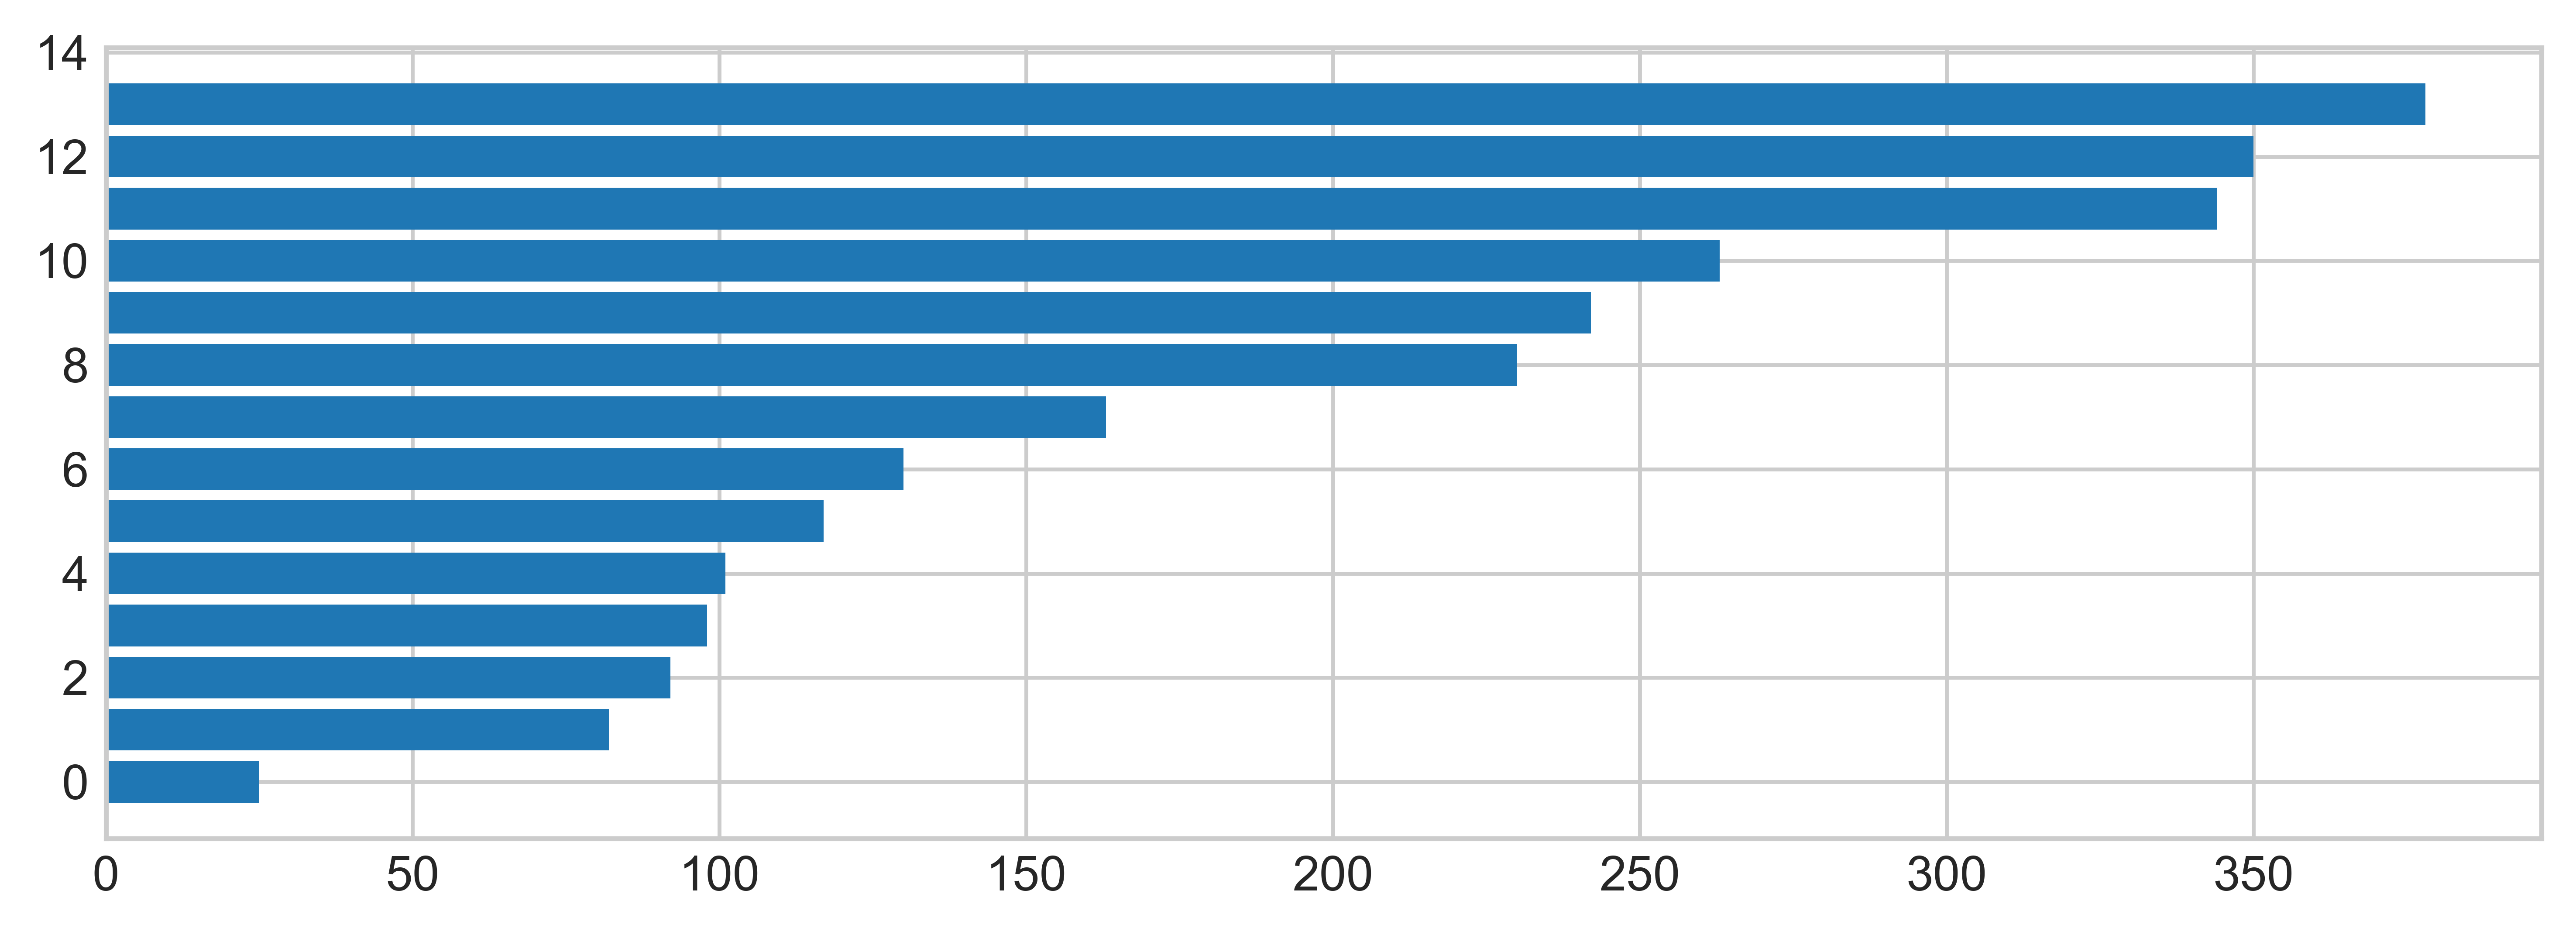

In [163]:
r = np.arange(14)
bar = df6.iloc[1]
plt.figure(figsize = (9,3), dpi = 800)
plt.barh(r,bar)
#cols = ['Building systems and equipment','\n', 
        #"Building operations and maintenance", 
        #"Building commissioning and energy auditing", 
        #"Building utilities", 
        #"Building envelop and geometry",
        #"Building additions, alterations, and retrofitting",
        #"Building materials", 
        #"Energy finance and market", 
        #"Building carbon emissions", 
        #"District system and facilities", 
        #"Building appliance", 
        #"Building occupance", 
        #"Grid optimization and demand response", 
        #"Community and neighborhood management"]
#plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [cols])



# Data Analytics

### Q9. Current use of data analytics 


In [27]:
# summing up binomials 

Q9_1 = data["Q9.1"].value_counts().sort_index()
Q9_2 = data["Q9.2"].value_counts().sort_index()
Q9_3 = data["Q9.3"].value_counts().sort_index()
Q9_4 = data["Q9.4"].value_counts().sort_index()
Q9_5 = data["Q9.5"].value_counts().sort_index()

print(Q9_1)
print(Q9_2)
print(Q9_3)
print(Q9_4) 
print(Q9_5)


0    136
1    312
Name: Q9.1, dtype: int64
0     72
1    376
Name: Q9.2, dtype: int64
0    150
1    298
Name: Q9.3, dtype: int64
0    333
1    115
Name: Q9.4, dtype: int64
0    329
1    119
Name: Q9.5, dtype: int64


In [28]:
# creating data frame of series 

df  = pd.DataFrame()
df["1"] = Q9_1
df["2"] = Q9_2
df["3"] = Q9_3
df["4"] = Q9_4
df["5"] = Q9_5

df

,1,2,3,4,5
0,136,72,150,333,329
1,312,376,298,115,119


([<matplotlib.axis.XTick at 0x111956a90>,
 <a list of 5 Text xticklabel objects>)

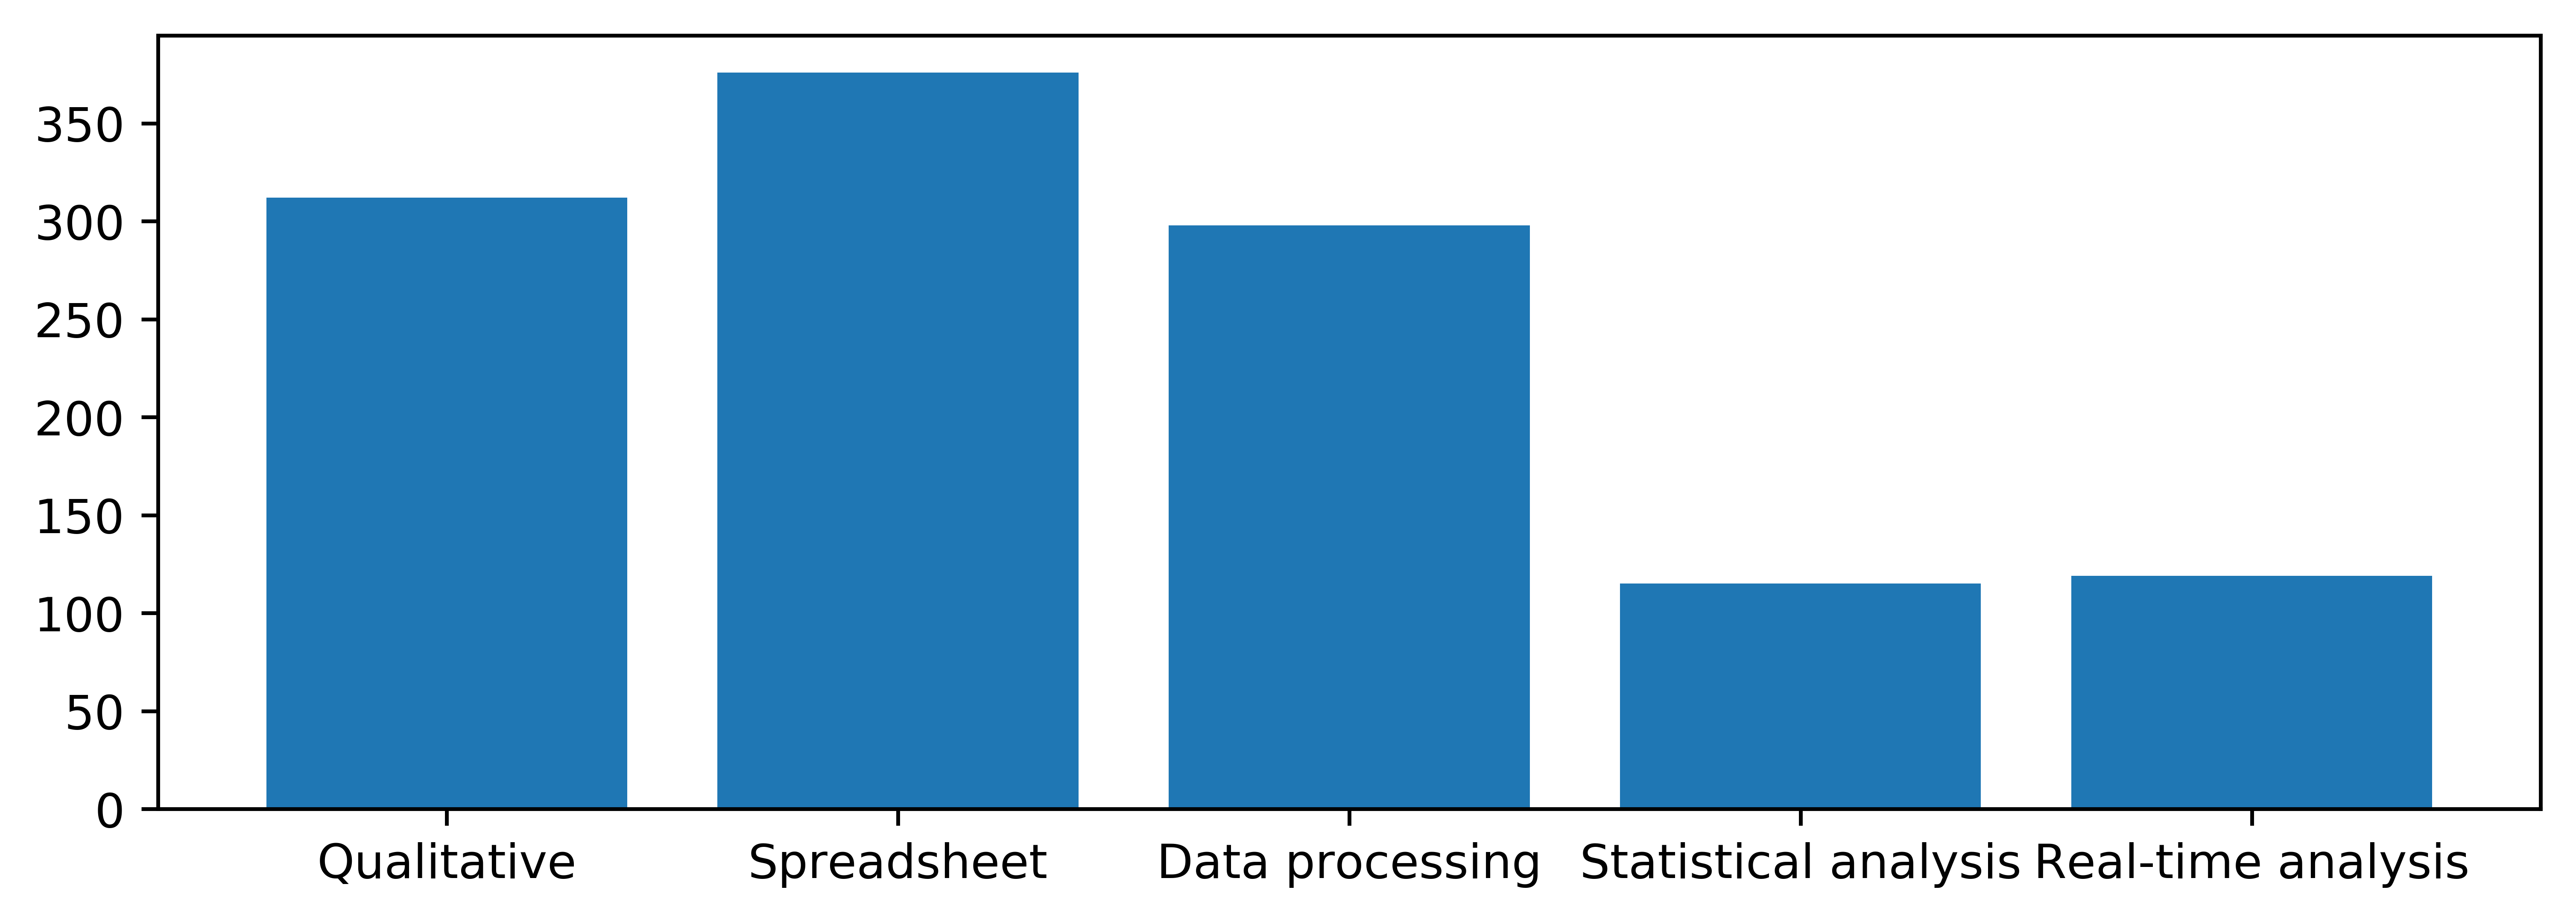

In [30]:
# plot current use of data analytics 

r = np.arange(5)
bar = df.iloc[1]
plt.figure(figsize = (9,3), dpi = 800)
plt.bar(r,bar)
cols = ["Qualitative", "Spreadsheet", "Data processing", "Statistical analysis", "Real-time analysis"]
plt.xticks([0, 1, 2, 3, 4], cols)


In [71]:
# bootstrap method to generate confidence intervals for each current uses of data analytics 
# (5 bars total)

# Use: qualitative

m= data["Q9.1"]
size = len(m)

In [72]:
# boostrap: sampling with replacement from original sample

all_means = []

for i in range (4000): 
    bs_r = np.random.choice(m, len(m), replace = True)
    mean = np.sum(bs_r[bs_r ==1])/len(bs_r)
    all_means.append(mean)

In [73]:
all_means

[0.7120535714285714,
 0.7254464285714286,
 0.6808035714285714,
 0.6897321428571429,
 0.6696428571428571,
 0.7165178571428571,
 0.6964285714285714,
 0.6473214285714286,
 0.6741071428571429,
 0.6875,
 0.6919642857142857,
 0.7254464285714286,
 0.6808035714285714,
 0.7142857142857143,
 0.6763392857142857,
 0.6785714285714286,
 0.7165178571428571,
 0.6852678571428571,
 0.6808035714285714,
 0.6674107142857143,
 0.6629464285714286,
 0.6741071428571429,
 0.7075892857142857,
 0.7165178571428571,
 0.7165178571428571,
 0.6875,
 0.6607142857142857,
 0.7008928571428571,
 0.6964285714285714,
 0.6897321428571429,
 0.6785714285714286,
 0.6964285714285714,
 0.7165178571428571,
 0.7008928571428571,
 0.7142857142857143,
 0.6919642857142857,
 0.7008928571428571,
 0.6272321428571429,
 0.7098214285714286,
 0.6852678571428571,
 0.7075892857142857,
 0.6785714285714286,
 0.6964285714285714,
 0.7008928571428571,
 0.7142857142857143,
 0.703125,
 0.6986607142857143,
 0.6941964285714286,
 0.6941964285714286,
 0.69

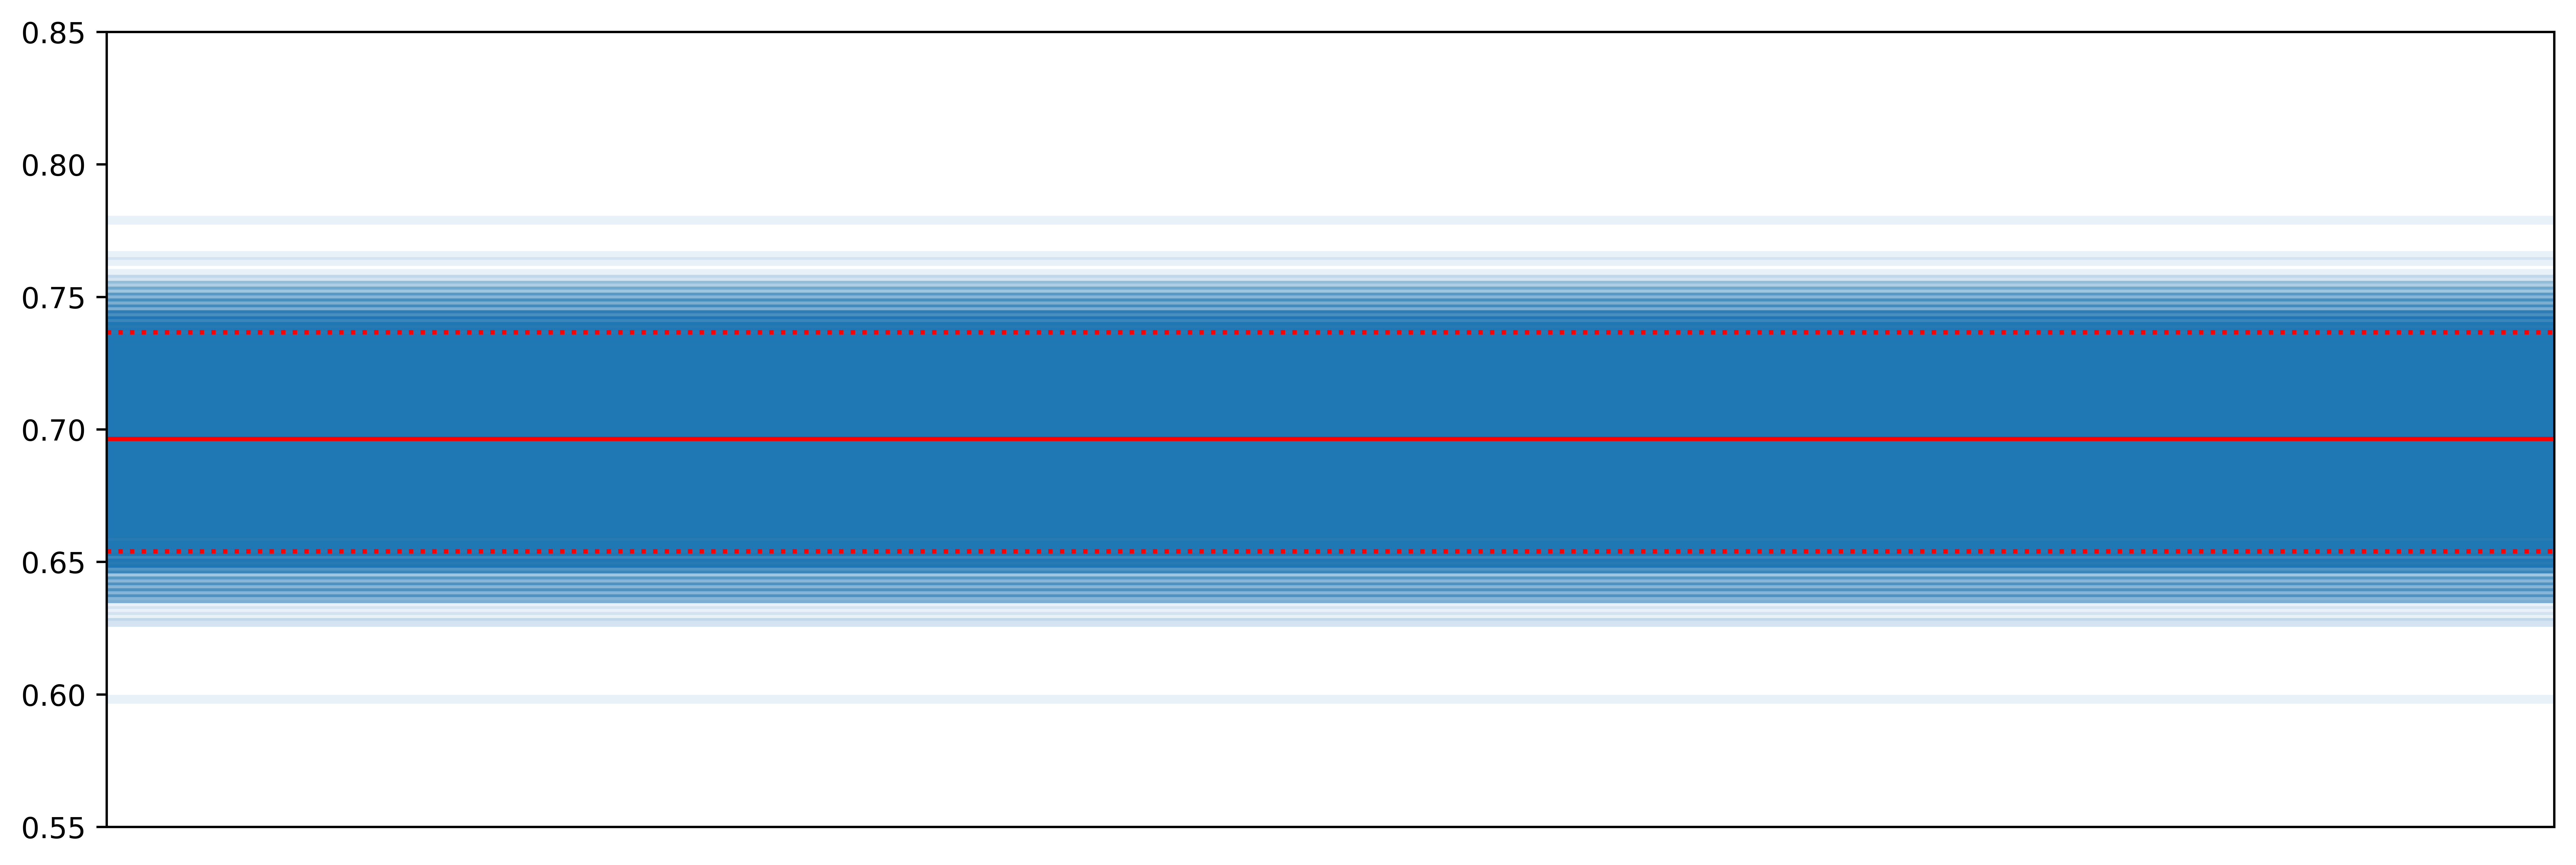

In [120]:
# bootstrap: plotting boostrap mean and 95% confidance interval
# ** WARNING: Confidence intervals take a while to generate. **

plt.figure(figsize=(15,5), dpi = 800)

for elem in all_means:
    plt.axhline(y=elem, xmin=0, xmax=1, alpha=0.1, linewidth = 3)

plt.ylim((0.55,0.85))

mean = np.percentile(all_means, [50])
plt.axhline(y=mean, xmin=0, xmax=1, color = "red")

bs_ci = np.percentile(all_means, [2.5, 97.5])

plt.axhline(y=bs_ci[0], xmin=0, xmax=1, color = "red", linestyle = "dotted")
plt.axhline(y=bs_ci[1], xmin=0, xmax=1, color = "red", linestyle = "dotted")
plt.tick_params(axis='x', bottom=False, labelbottom=False) 

In [74]:
# Use: Spreadsheet
n = data["Q9.2"]
size = len(n)

In [75]:
all_means = []

for i in range (4000): 
    bs_r = np.random.choice(n, len(n), replace = True)
    mean = np.sum(bs_r[bs_r ==1])/len(bs_r)
    all_means.append(mean)

In [76]:
all_means

[0.8303571428571429,
 0.8504464285714286,
 0.8214285714285714,
 0.828125,
 0.828125,
 0.8169642857142857,
 0.8504464285714286,
 0.8214285714285714,
 0.796875,
 0.859375,
 0.8482142857142857,
 0.8169642857142857,
 0.8325892857142857,
 0.8236607142857143,
 0.8571428571428571,
 0.859375,
 0.8571428571428571,
 0.8571428571428571,
 0.8325892857142857,
 0.8348214285714286,
 0.8571428571428571,
 0.8392857142857143,
 0.8080357142857143,
 0.8727678571428571,
 0.8660714285714286,
 0.8616071428571429,
 0.8325892857142857,
 0.8504464285714286,
 0.828125,
 0.828125,
 0.875,
 0.8504464285714286,
 0.8191964285714286,
 0.8683035714285714,
 0.8660714285714286,
 0.8303571428571429,
 0.8482142857142857,
 0.8415178571428571,
 0.8102678571428571,
 0.8236607142857143,
 0.7924107142857143,
 0.8504464285714286,
 0.8258928571428571,
 0.8214285714285714,
 0.8147321428571429,
 0.8348214285714286,
 0.8482142857142857,
 0.8191964285714286,
 0.8571428571428571,
 0.8549107142857143,
 0.8392857142857143,
 0.852678571

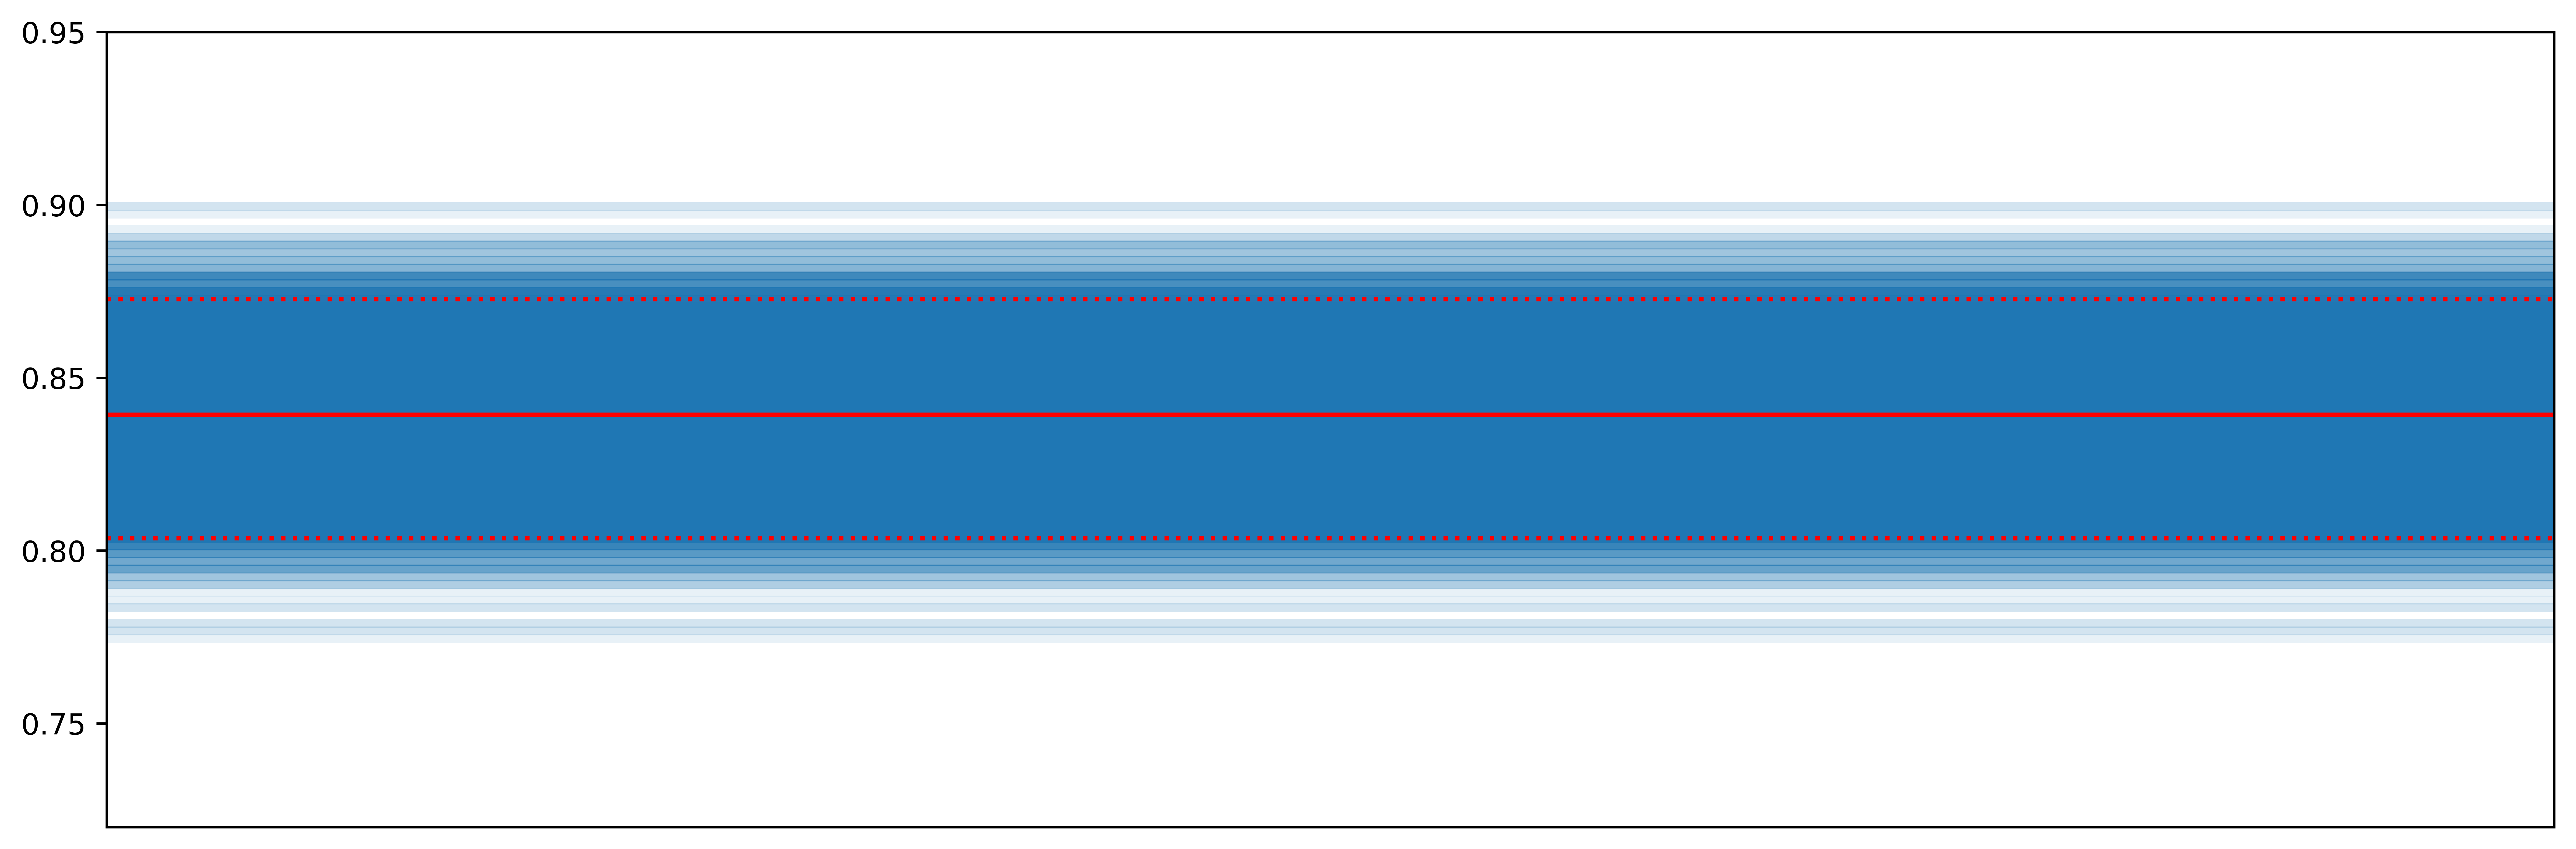

In [127]:
plt.figure(figsize=(15,5), dpi = 800)

for elem in all_means:
    plt.axhline(y=elem, xmin=0, xmax=1, alpha=0.1, linewidth = 3)

plt.ylim((0.72,0.95))

mean = np.percentile(all_means, [50])
plt.axhline(y=mean, xmin=0, xmax=1, color = "red")

bs_ci = np.percentile(all_means, [2.5, 97.5])

plt.axhline(y=bs_ci[0], xmin=0, xmax=1, color = "red", linestyle = "dotted")
plt.axhline(y=bs_ci[1], xmin=0, xmax=1, color = "red", linestyle = "dotted")
plt.tick_params(axis='x', bottom=False, labelbottom=False) 

In [77]:
# Use: Simple Models 

t = data["Q9.3"]
size = len(t)

In [78]:
all_means = []

for i in range (4000): 
    bs_r = np.random.choice(t, len(t), replace = True)
    mean = np.sum(bs_r[bs_r ==1])/len(bs_r)
    all_means.append(mean)

In [79]:
all_means

[0.6964285714285714,
 0.6830357142857143,
 0.6629464285714286,
 0.6339285714285714,
 0.7075892857142857,
 0.7053571428571429,
 0.6852678571428571,
 0.6919642857142857,
 0.6607142857142857,
 0.6875,
 0.703125,
 0.6383928571428571,
 0.7165178571428571,
 0.6651785714285714,
 0.6205357142857143,
 0.6674107142857143,
 0.6941964285714286,
 0.640625,
 0.6629464285714286,
 0.6651785714285714,
 0.6517857142857143,
 0.6383928571428571,
 0.6495535714285714,
 0.6517857142857143,
 0.6450892857142857,
 0.65625,
 0.6674107142857143,
 0.6339285714285714,
 0.6986607142857143,
 0.6785714285714286,
 0.6964285714285714,
 0.6205357142857143,
 0.6651785714285714,
 0.5982142857142857,
 0.65625,
 0.6272321428571429,
 0.6138392857142857,
 0.671875,
 0.6897321428571429,
 0.6495535714285714,
 0.6808035714285714,
 0.6473214285714286,
 0.6674107142857143,
 0.6495535714285714,
 0.6763392857142857,
 0.6428571428571429,
 0.6763392857142857,
 0.6584821428571429,
 0.6785714285714286,
 0.6361607142857143,
 0.640625,
 0.

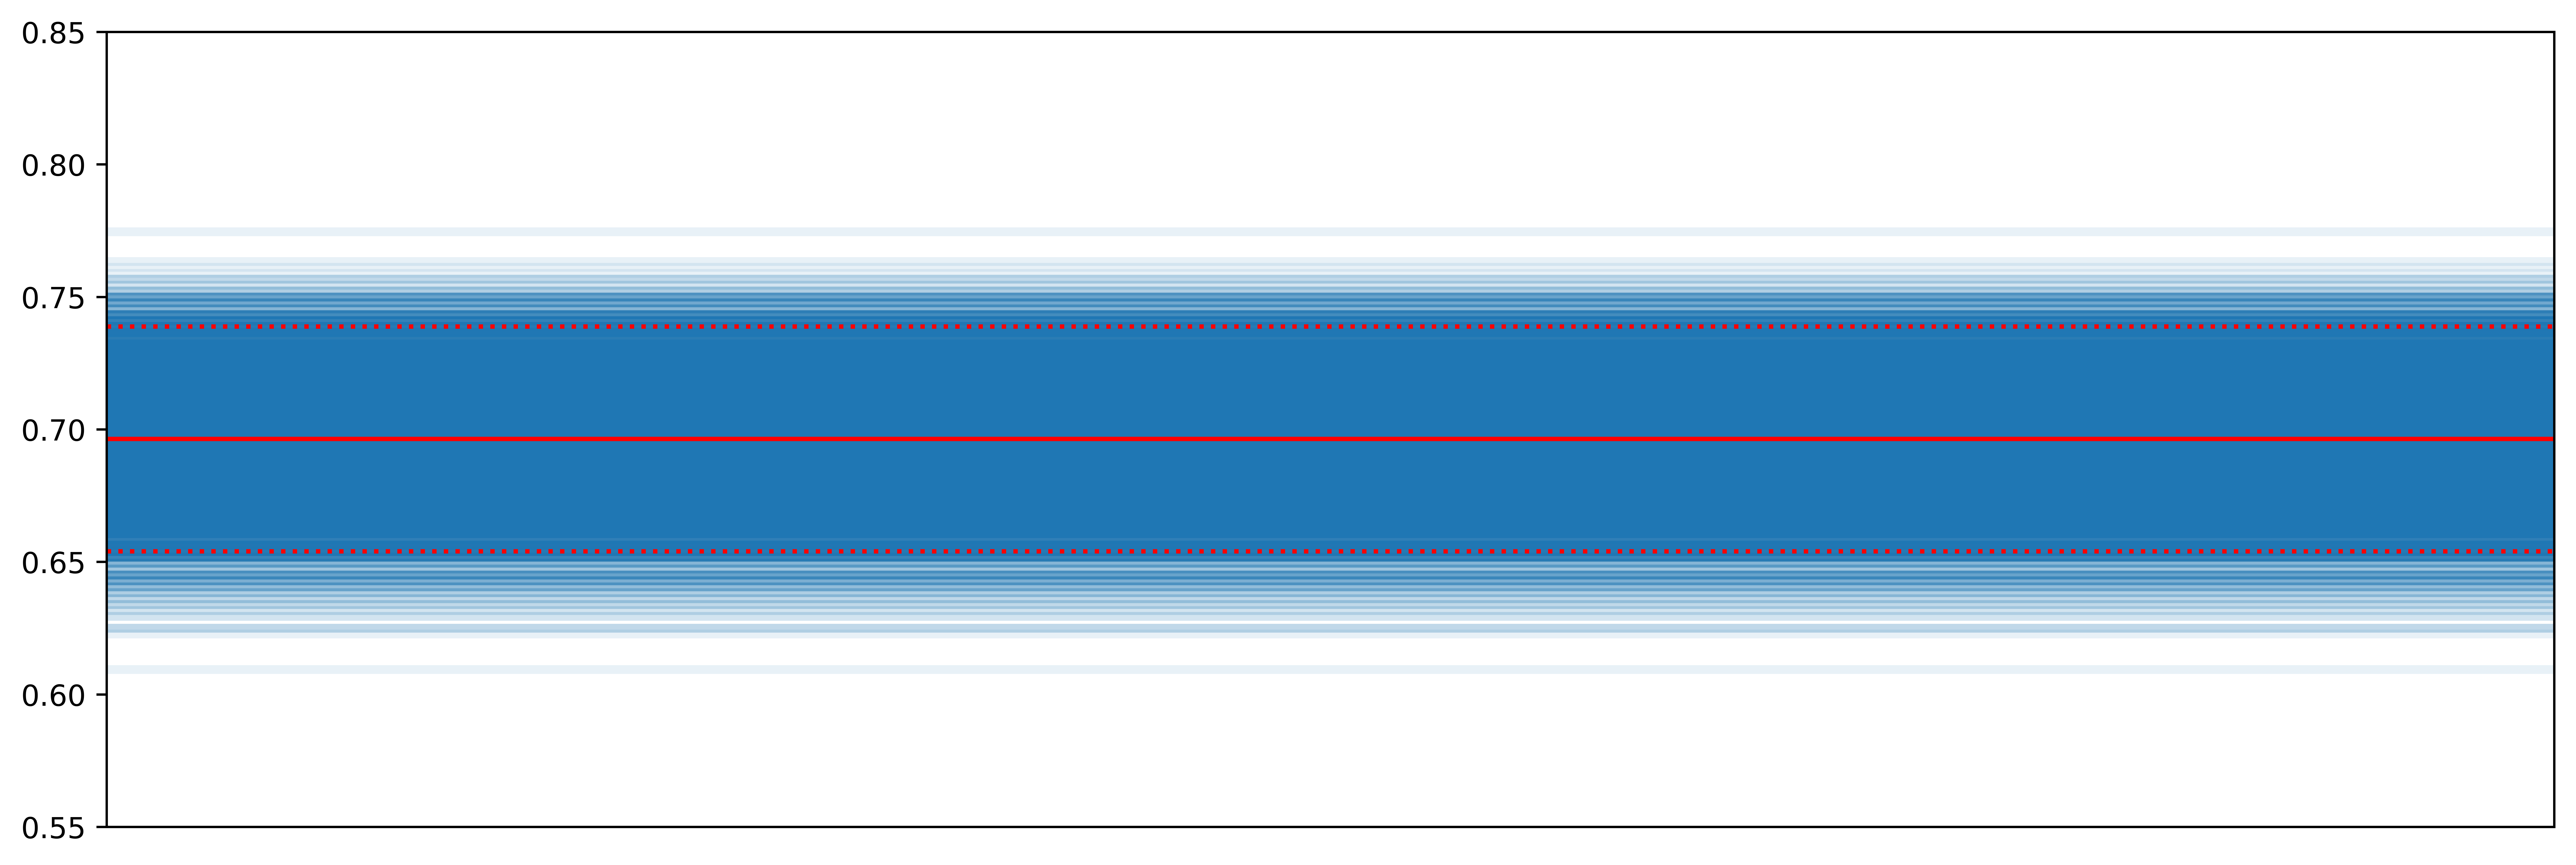

In [133]:
plt.figure(figsize=(15,5), dpi = 800)

for elem in all_means:
    plt.axhline(y=elem, xmin=0, xmax=1, alpha=0.1, linewidth = 3)

plt.ylim((0.55,0.85))

mean = np.percentile(all_means, [50])
plt.axhline(y=mean, xmin=0, xmax=1, color = "red")

bs_ci = np.percentile(all_means, [2.5, 97.5])

plt.axhline(y=bs_ci[0], xmin=0, xmax=1, color = "red", linestyle = "dotted")
plt.axhline(y=bs_ci[1], xmin=0, xmax=1, color = "red", linestyle = "dotted")
plt.tick_params(axis='x', bottom=False, labelbottom=False) 

In [138]:
# Use: Statistical Analysis

u = data["Q9.4"]
size = len(u)

In [139]:
all_means = []

for i in range (4000): 
    bs_r = np.random.choice(u, len(u), replace = True)
    mean = np.sum(bs_r[bs_r ==1])/len(bs_r)
    all_means.append(mean)

In [140]:
all_means

[0.25223214285714285,
 0.2611607142857143,
 0.23883928571428573,
 0.25669642857142855,
 0.22991071428571427,
 0.29910714285714285,
 0.23214285714285715,
 0.234375,
 0.23660714285714285,
 0.24330357142857142,
 0.234375,
 0.27232142857142855,
 0.22991071428571427,
 0.23214285714285715,
 0.25223214285714285,
 0.27901785714285715,
 0.2767857142857143,
 0.29910714285714285,
 0.25,
 0.25,
 0.234375,
 0.30357142857142855,
 0.24776785714285715,
 0.25223214285714285,
 0.27455357142857145,
 0.23214285714285715,
 0.28348214285714285,
 0.25892857142857145,
 0.25669642857142855,
 0.27232142857142855,
 0.25669642857142855,
 0.21428571428571427,
 0.24553571428571427,
 0.26339285714285715,
 0.24330357142857142,
 0.22544642857142858,
 0.28348214285714285,
 0.29017857142857145,
 0.24553571428571427,
 0.29464285714285715,
 0.27901785714285715,
 0.28794642857142855,
 0.2767857142857143,
 0.25669642857142855,
 0.27232142857142855,
 0.23660714285714285,
 0.27232142857142855,
 0.28348214285714285,
 0.2700892

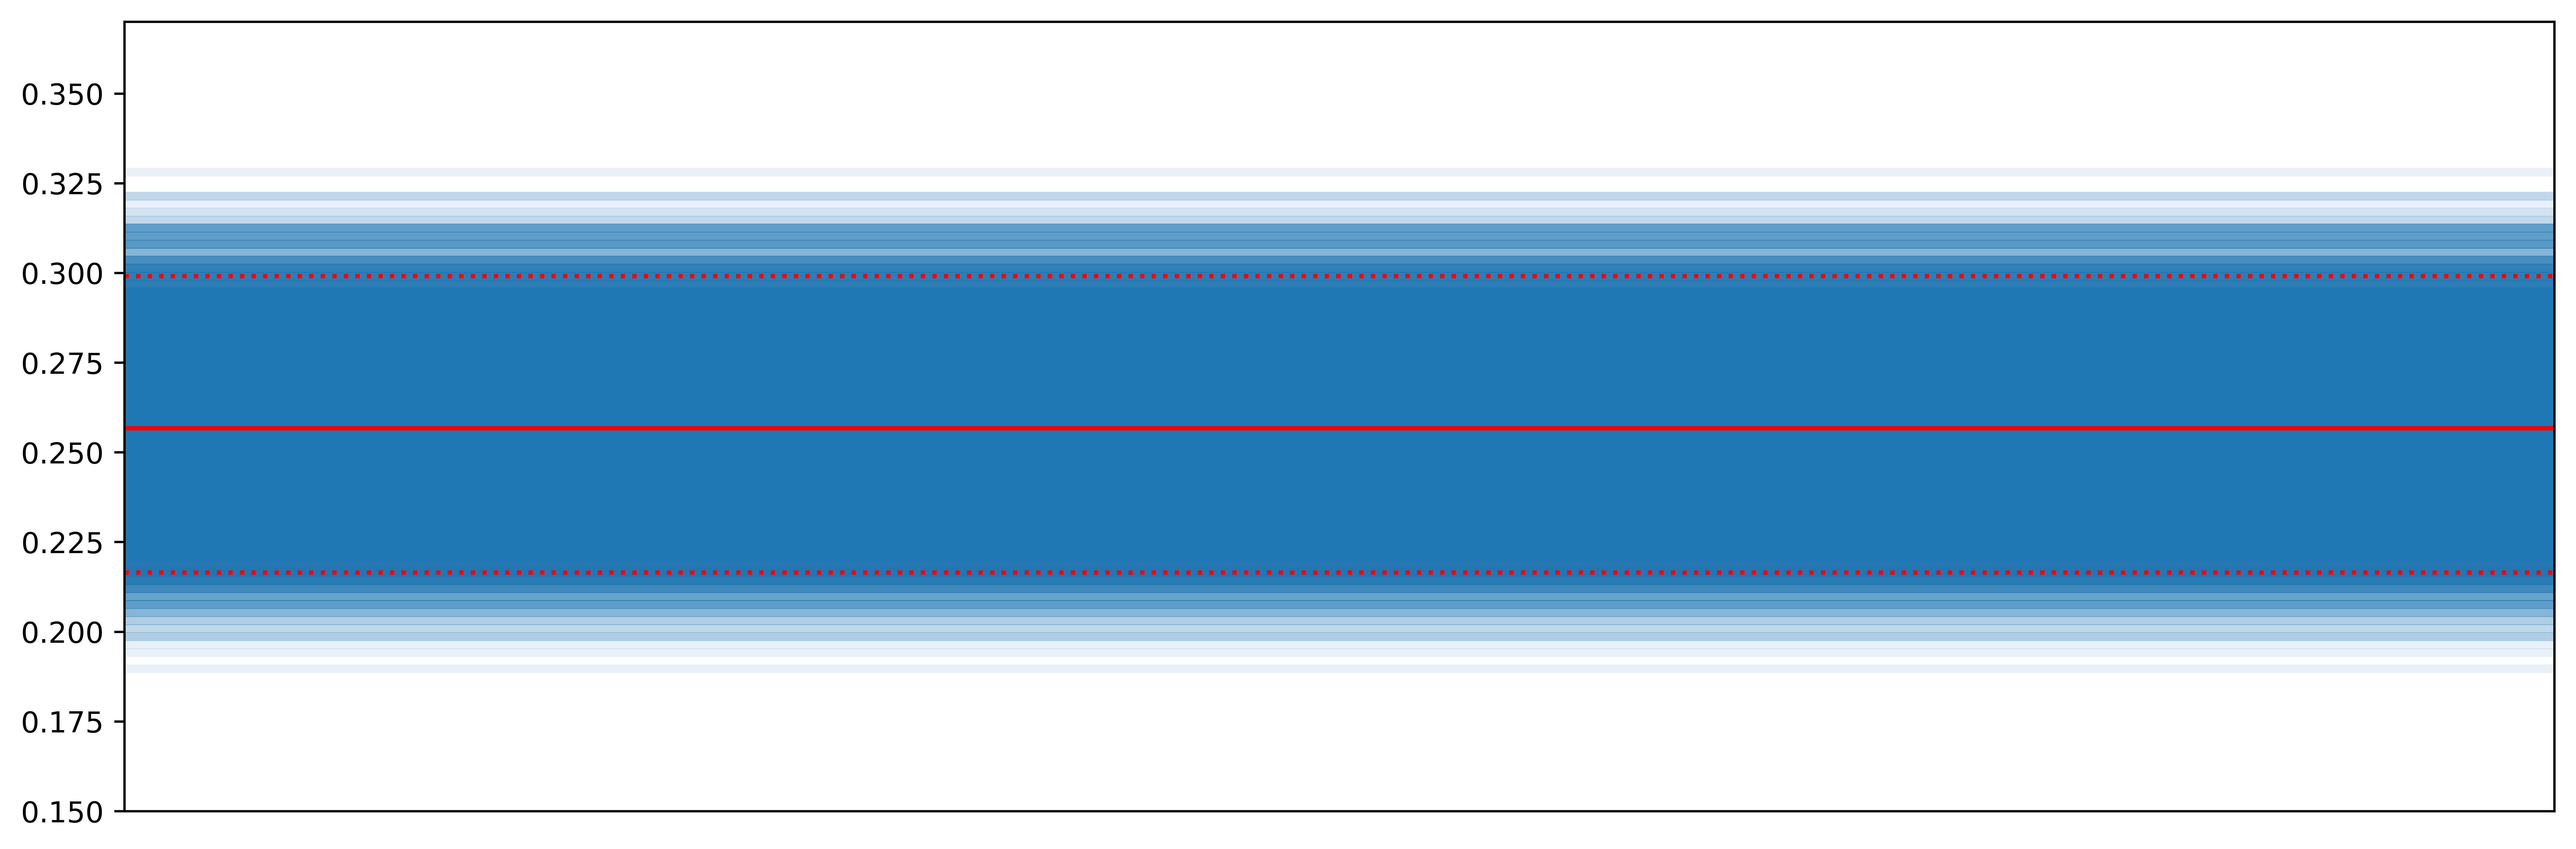

In [150]:
plt.figure(figsize=(15,5), dpi = 800)

for elem in all_means:
    plt.axhline(y=elem, xmin=0, xmax=1, alpha=0.1, linewidth = 3)

plt.ylim((0.15,0.37))

mean = np.percentile(all_means, [50])
plt.axhline(y=mean, xmin=0, xmax=1, color = "red")

bs_ci = np.percentile(all_means, [2.5, 97.5])

plt.axhline(y=bs_ci[0], xmin=0, xmax=1, color = "red", linestyle = "dotted")
plt.axhline(y=bs_ci[1], xmin=0, xmax=1, color = "red", linestyle = "dotted")
plt.tick_params(axis='x', bottom=False, labelbottom=False) 

In [21]:
# Use: Real-time Analysis
w = data["Q9.5"]
size = len(w)

In [22]:
all_means = []

for i in range (4000): 
    bs_r = np.random.choice(w, len(w), replace = True)
    mean = np.sum(bs_r[bs_r ==1])/len(bs_r)
    all_means.append(mean)

In [23]:
all_means

[0.23214285714285715,
 0.2611607142857143,
 0.26339285714285715,
 0.23883928571428573,
 0.265625,
 0.26785714285714285,
 0.26339285714285715,
 0.24330357142857142,
 0.2700892857142857,
 0.25669642857142855,
 0.27455357142857145,
 0.2924107142857143,
 0.2924107142857143,
 0.27455357142857145,
 0.21651785714285715,
 0.2767857142857143,
 0.24776785714285715,
 0.28125,
 0.25,
 0.28794642857142855,
 0.2924107142857143,
 0.26339285714285715,
 0.234375,
 0.2544642857142857,
 0.24776785714285715,
 0.24107142857142858,
 0.26339285714285715,
 0.28125,
 0.27901785714285715,
 0.24553571428571427,
 0.27901785714285715,
 0.25223214285714285,
 0.24330357142857142,
 0.25892857142857145,
 0.3080357142857143,
 0.29910714285714285,
 0.26339285714285715,
 0.25223214285714285,
 0.3080357142857143,
 0.27232142857142855,
 0.2611607142857143,
 0.2924107142857143,
 0.22767857142857142,
 0.27455357142857145,
 0.22991071428571427,
 0.25,
 0.2700892857142857,
 0.29464285714285715,
 0.25892857142857145,
 0.2633928

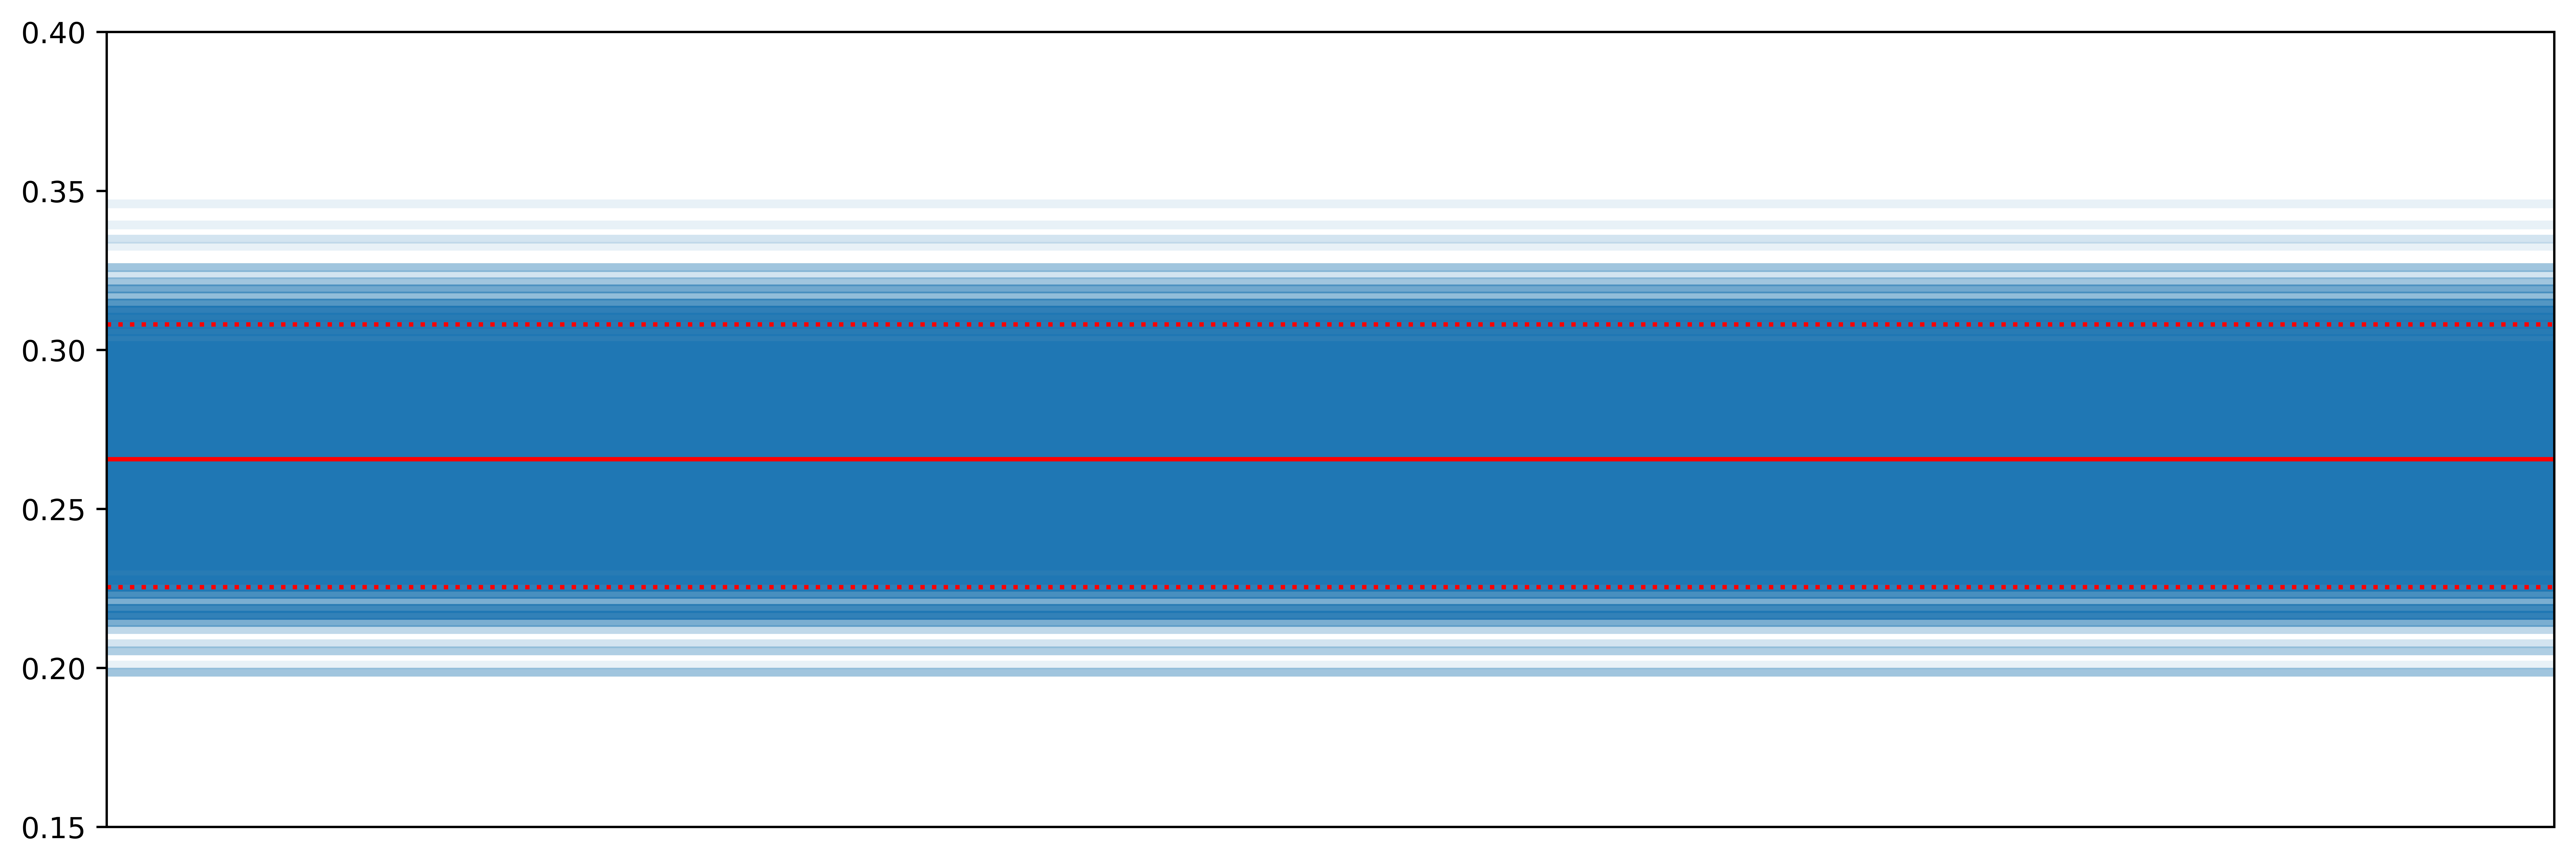

In [26]:
plt.figure(figsize=(15,5), dpi = 800)

for elem in all_means:
    plt.axhline(y=elem, xmin=0, xmax=1, alpha=0.1, linewidth = 3)

plt.ylim((0.15,0.40))

mean = np.percentile(all_means, [50])
plt.axhline(y=mean, xmin=0, xmax=1, color = "red")

bs_ci = np.percentile(all_means, [2.5, 97.5])

plt.axhline(y=bs_ci[0], xmin=0, xmax=1, color = "red", linestyle = "dotted")
plt.axhline(y=bs_ci[1], xmin=0, xmax=1, color = "red", linestyle = "dotted")
plt.tick_params(axis='x', bottom=False, labelbottom=False) 

### Q11. Usefullness of data analytics in decision-making process


In [46]:
# sum up binomials

Q11_1 = data["Q11.1"].value_counts().sort_index()
Q11_2 = data["Q11.2"].value_counts().sort_index() 
Q11_3 = data["Q11.3"].value_counts().sort_index() 
Q11_4 = data["Q11.4"].value_counts().sort_index() 
Q11_5 = data["Q11.5"].value_counts().sort_index()
Q11_6 = data["Q11.6"].value_counts().sort_index() 
Q11_7 = data["Q11.7"].value_counts().sort_index()

In [47]:
cols = ["Discuss Scope", "Get Feedback", "Generate Alternatives", "Evaluate Decisions", "Identify Problems", "Validate alternatives", "Gather information"]

In [48]:
df = Q11_1.to_frame

In [158]:
df  = pd.DataFrame()
df["1"] = Q11_2
df["2"] = Q11_5
df["3"] = Q11_4
df["4"] = Q11_7
df["5"] = Q11_1
df["6"] = Q11_6
df["7"] = Q11_3

In [159]:
df

,1,2,3,4,5,6,7
1,128,55,60,26,19,16,9
2,62,81,68,77,71,47,18
3,121,127,75,69,46,70,85
4,59,74,133,96,137,161,122
5,78,111,112,180,175,154,214


In [160]:

cmap = plt.get_cmap('tab20b')
rgba = cmap(0.5)
print(rgba)

(0.9058823529411765, 0.7294117647058823, 0.3215686274509804, 1.0)


([<matplotlib.axis.XTick at 0x1a16712128>,
 <a list of 7 Text xticklabel objects>)

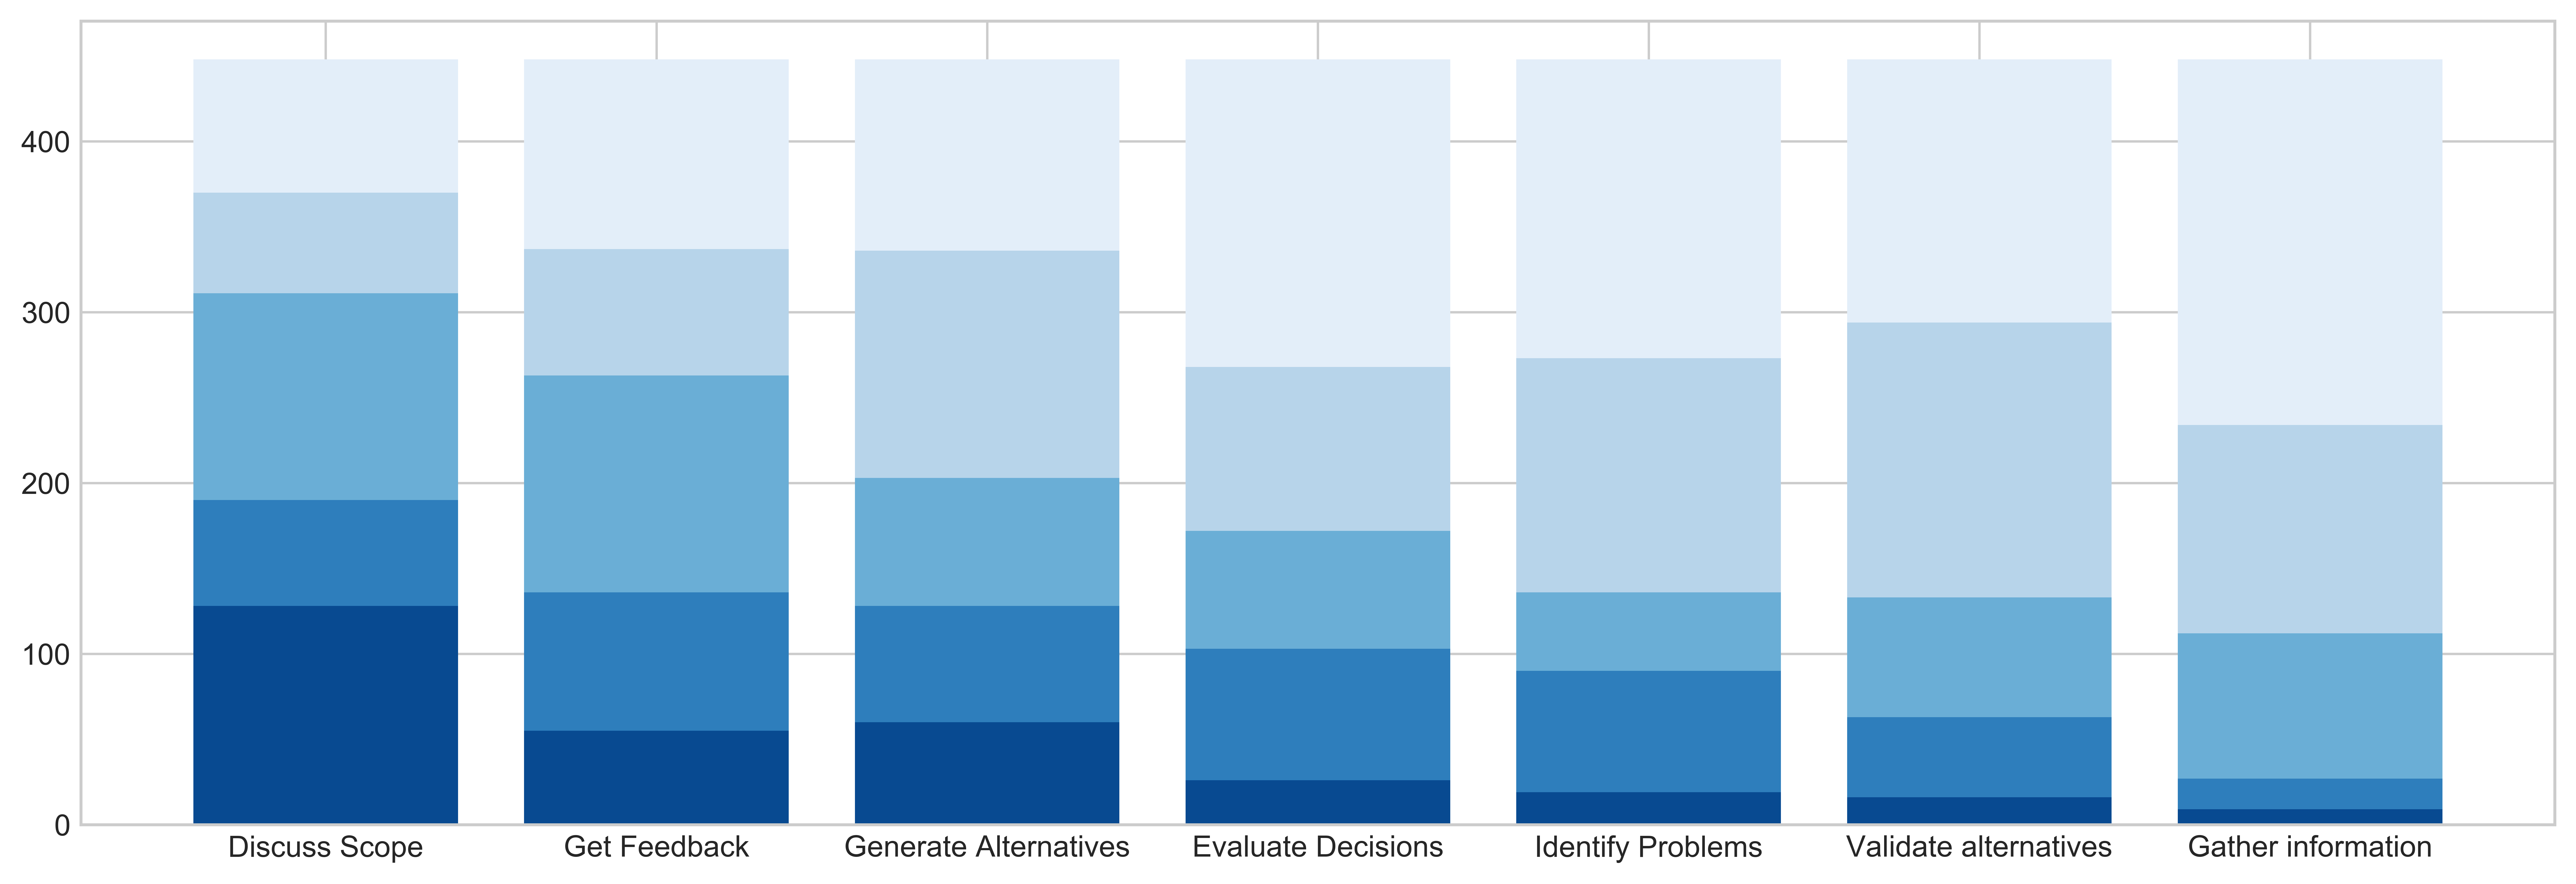

In [161]:
r = np.arange(7)
b = df.iloc[0]
c = df.iloc[1]
d = df.iloc[2]
e = df.iloc[3]
f = df.iloc[4]

plt.figure(figsize = (15,5), dpi = 800)
cmap = plt.get_cmap('Blues')
plt.bar(r,b, color = cmap(0.9))
plt.bar(r,c, bottom = b, color = cmap(0.7))
plt.bar(r,d, bottom = b+c, color = cmap(0.5))
plt.bar(r,e, bottom = b+c+d, color = cmap(0.3))
plt.bar(r,f, bottom = b+c+d+e, color = cmap(0.1))

plt.xticks([0, 1, 2, 3, 4, 5, 6], cols)

### Q12. Issues with data analytics


In [74]:
Q12_1 = data["Q12.1"].value_counts().sort_index()
Q12_2 = data["Q12.2"].value_counts().sort_index()
Q12_3 = data["Q12.3"].value_counts().sort_index()
Q12_4 = data["Q12.4"].value_counts().sort_index()

print(Q12_1)
print(Q12_2)
print(Q12_3)
print(Q12_4) 



0    256
1    192
Name: Q12.1, dtype: int64
0    276
1    172
Name: Q12.2, dtype: int64
0    143
1    305
Name: Q12.3, dtype: int64
0    255
1    193
Name: Q12.4, dtype: int64


In [75]:
df  = pd.DataFrame()
df["1"] = Q12_1
df["2"] = Q12_2
df["3"] = Q12_3
df["4"] = Q12_4


df

,1,2,3,4
0,256,276,143,255
1,192,172,305,193


([<matplotlib.axis.XTick at 0x1a17d2a908>,
 <a list of 4 Text xticklabel objects>)

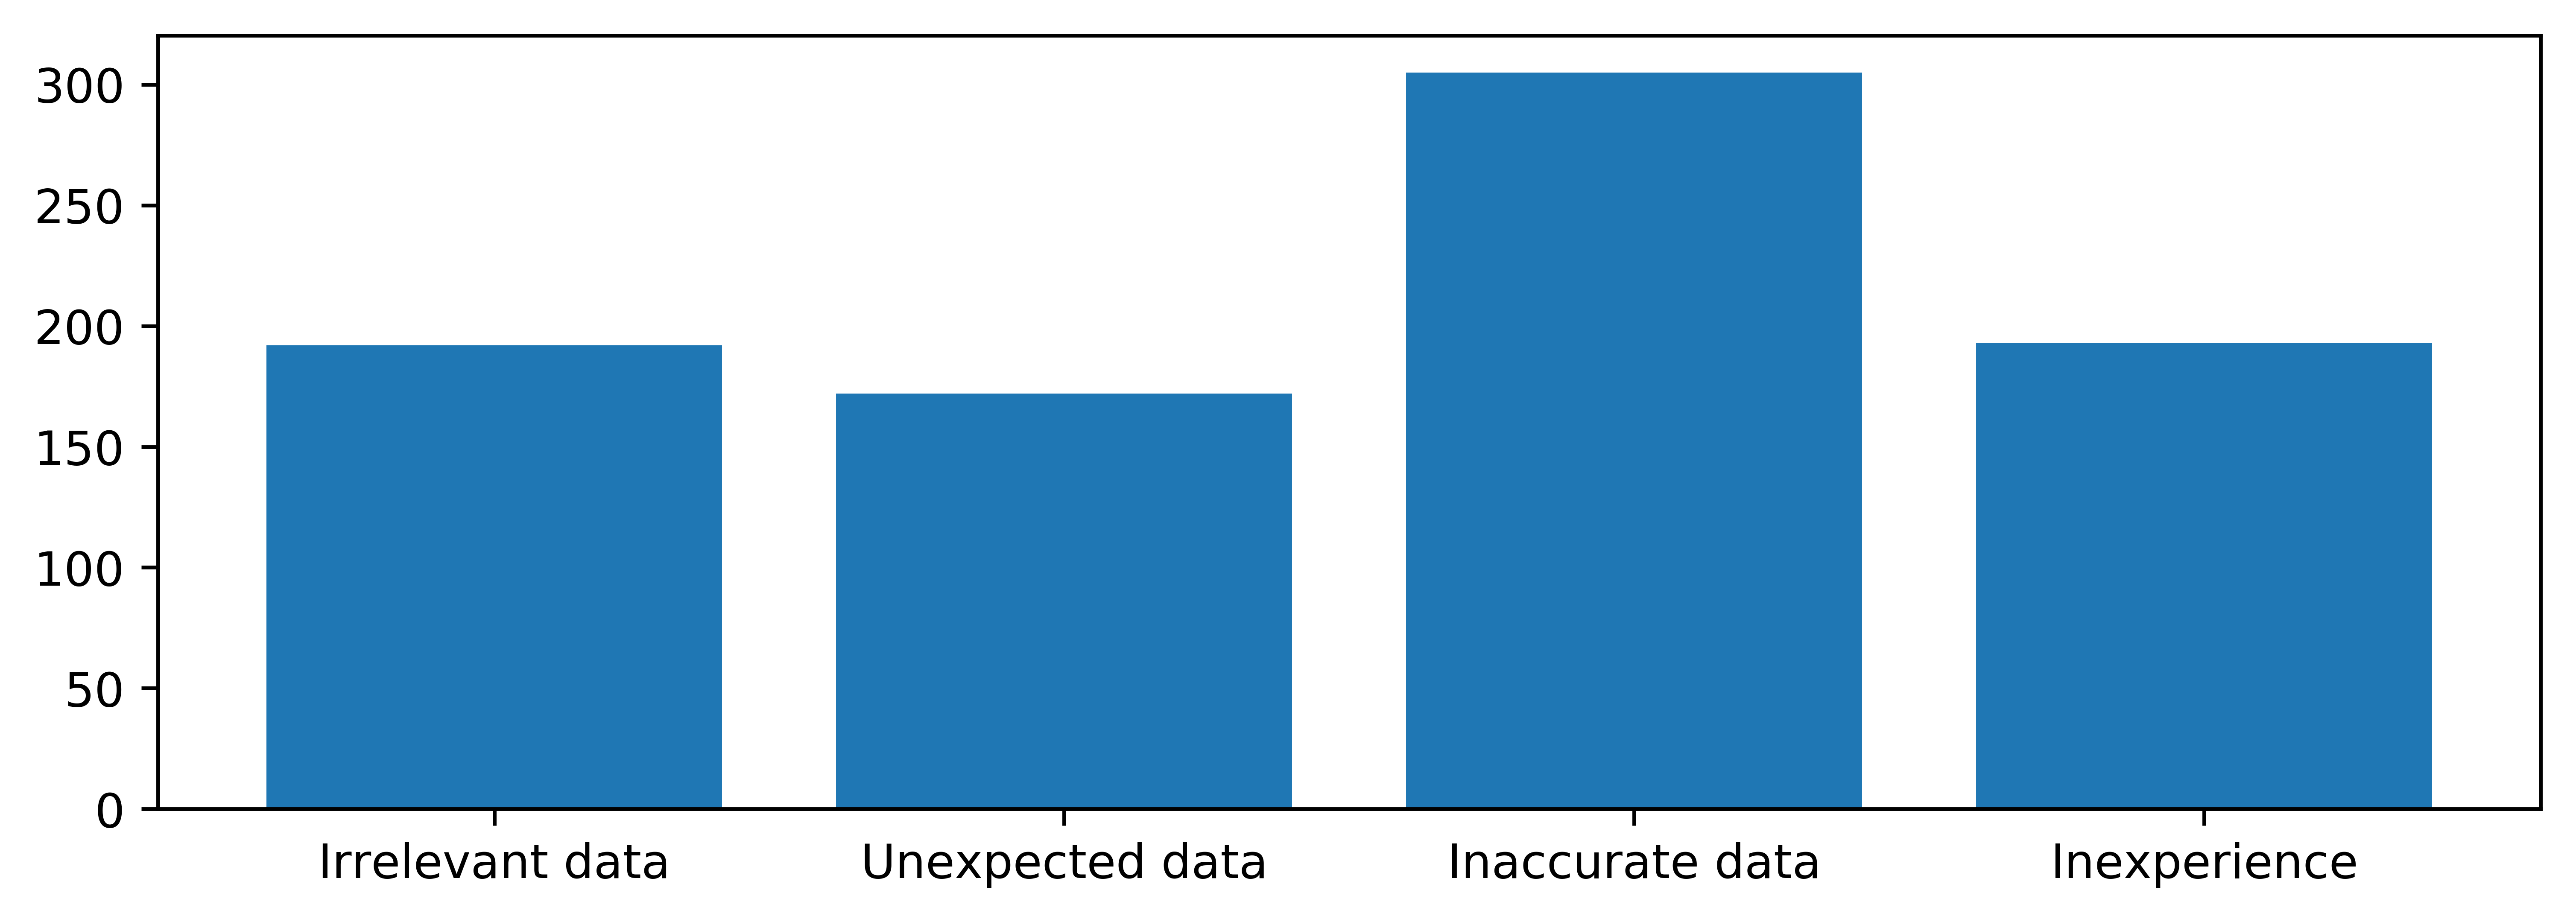

In [76]:
r = np.arange(4)
bar = df.iloc[1]
plt.figure(figsize = (9,3), dpi = 800)
plt.bar(r,bar)
cols = ["Irrelevant data", "Unexpected data", "Inaccurate data", "Inexperience"]
plt.xticks([0, 1, 2, 3], cols)

# Simulation

### Q15. Current use of simulation 


In [5]:
# summing up binomials 

Q15_1 = data["Q15.1"].value_counts().sort_index()
Q15_2 = data["Q15.2"].value_counts().sort_index()
Q15_3 = data["Q15.3"].value_counts().sort_index()
Q15_4 = data["Q15.4"].value_counts().sort_index()
Q15_5 = data["Q15.5"].value_counts().sort_index()

print(Q15_1)
print(Q15_2)
print(Q15_3)
print(Q15_4) 
print(Q15_5)


0    211
1    237
Name: Q15.1, dtype: int64
0    273
1    175
Name: Q15.2, dtype: int64
0     51
1    397
Name: Q15.3, dtype: int64
0    283
1    165
Name: Q15.4, dtype: int64
0    317
1    131
Name: Q15.5, dtype: int64


([<matplotlib.axis.XTick at 0x108a57860>,
 <a list of 5 Text xticklabel objects>)

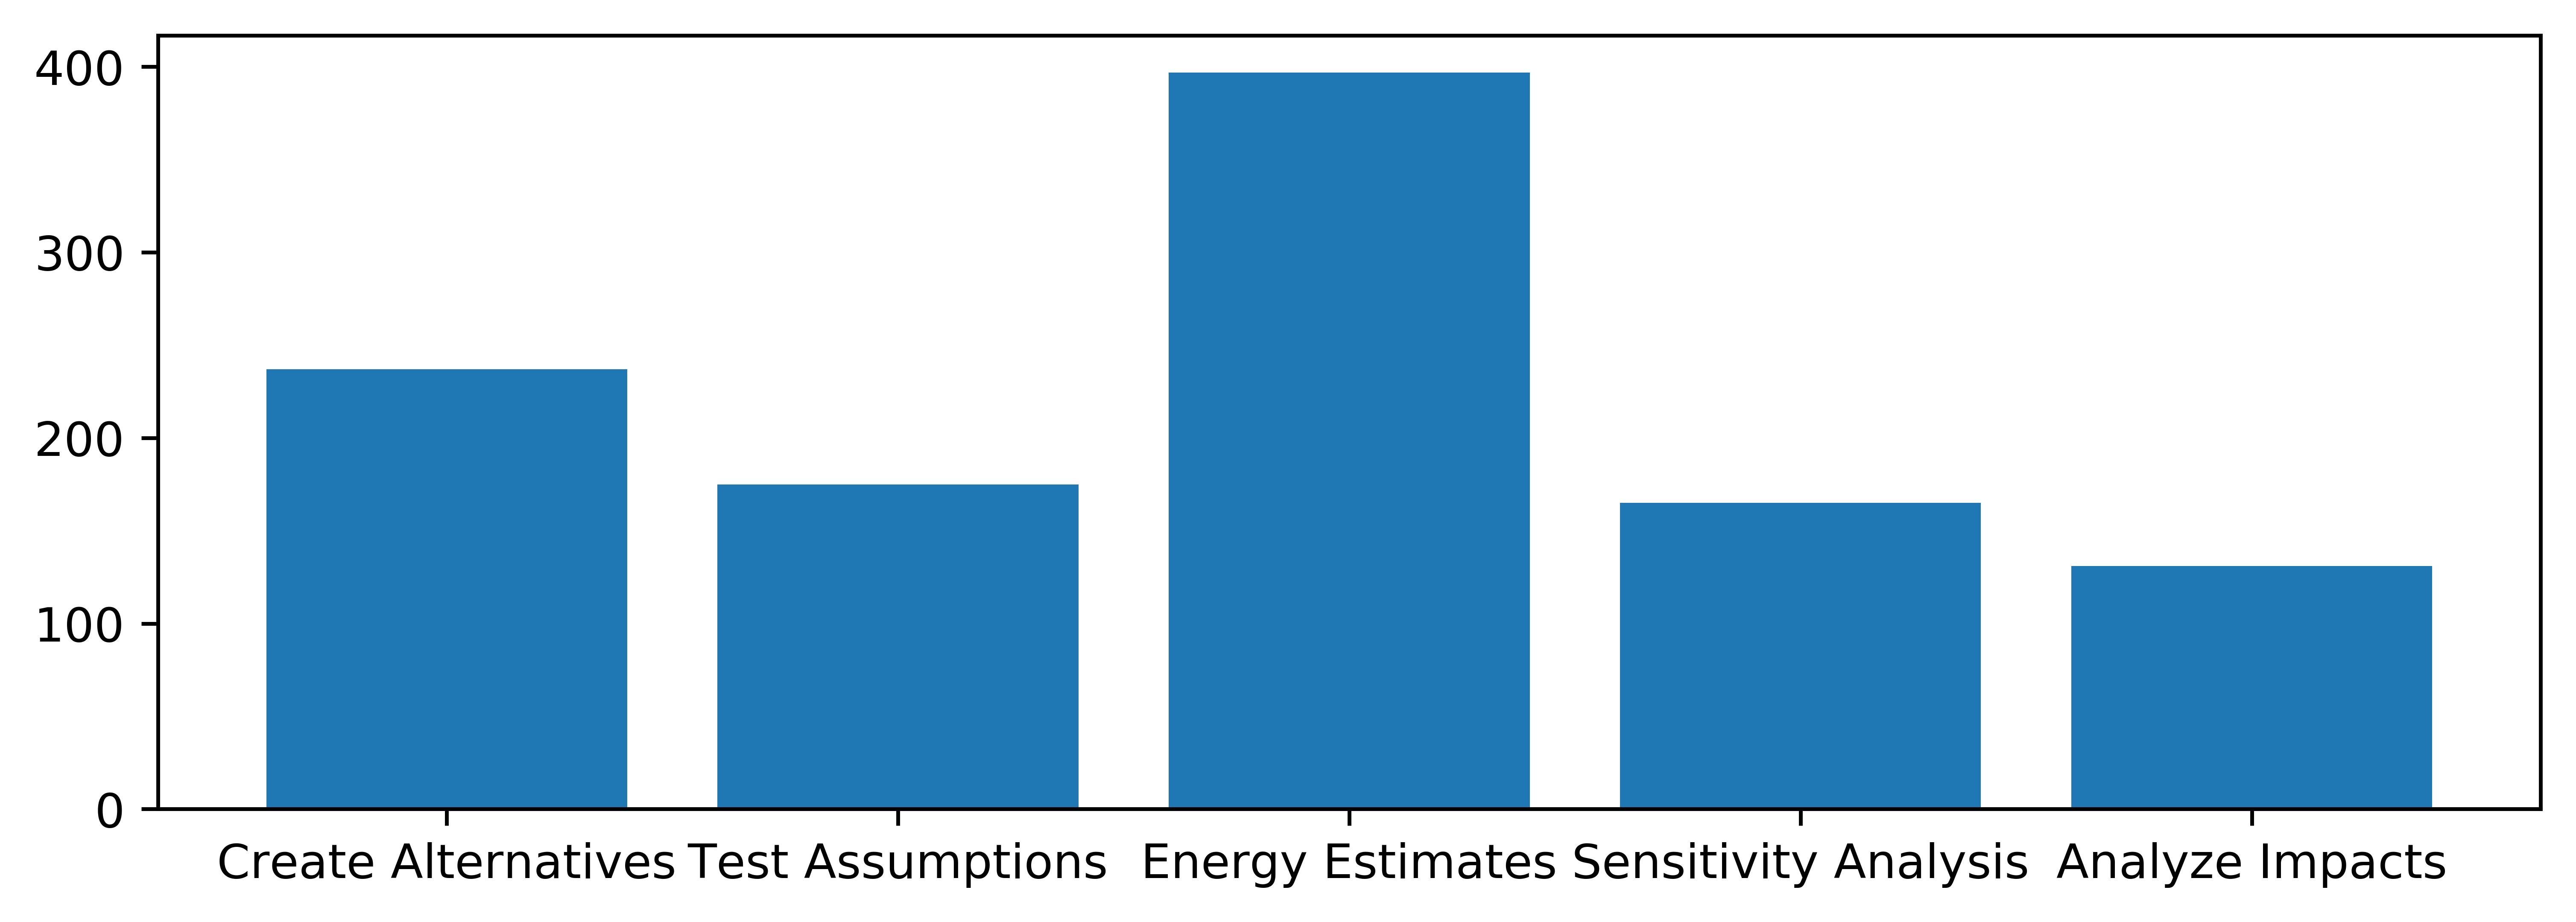

In [6]:
# creating data frame of series 

df  = pd.DataFrame()
df["1"] = Q15_1
df["2"] = Q15_2
df["3"] = Q15_3
df["4"] = Q15_4
df["5"] = Q15_5

df

# plot current use of data analytics 

r = np.arange(5)
bar = df.iloc[1]
plt.figure(figsize = (9,3), dpi = 800)
plt.bar(r,bar)
cols = ["Create Alternatives", "Test Assumptions", "Energy Estimates", "Sensitivity Analysis", "Analyze Impacts"]
plt.xticks([0, 1, 2, 3, 4], cols)

### Q18. Issues with simulation 


In [31]:
Q18_1 = data["Q18.1"].value_counts().sort_index()
Q18_2 = data["Q18.2"].value_counts().sort_index()
Q18_3 = data["Q18.3"].value_counts().sort_index()
Q18_4 = data["Q18.4"].value_counts().sort_index()

print(Q18_1)
print(Q18_2)
print(Q18_3)
print(Q18_4) 

0    195
1    253
Name: Q18.1, dtype: int64
0    282
1    166
Name: Q18.2, dtype: int64
0     91
1    357
Name: Q18.3, dtype: int64
0    282
1    166
Name: Q18.4, dtype: int64


([<matplotlib.axis.XTick at 0x110b93ac8>,
 <a list of 4 Text xticklabel objects>)

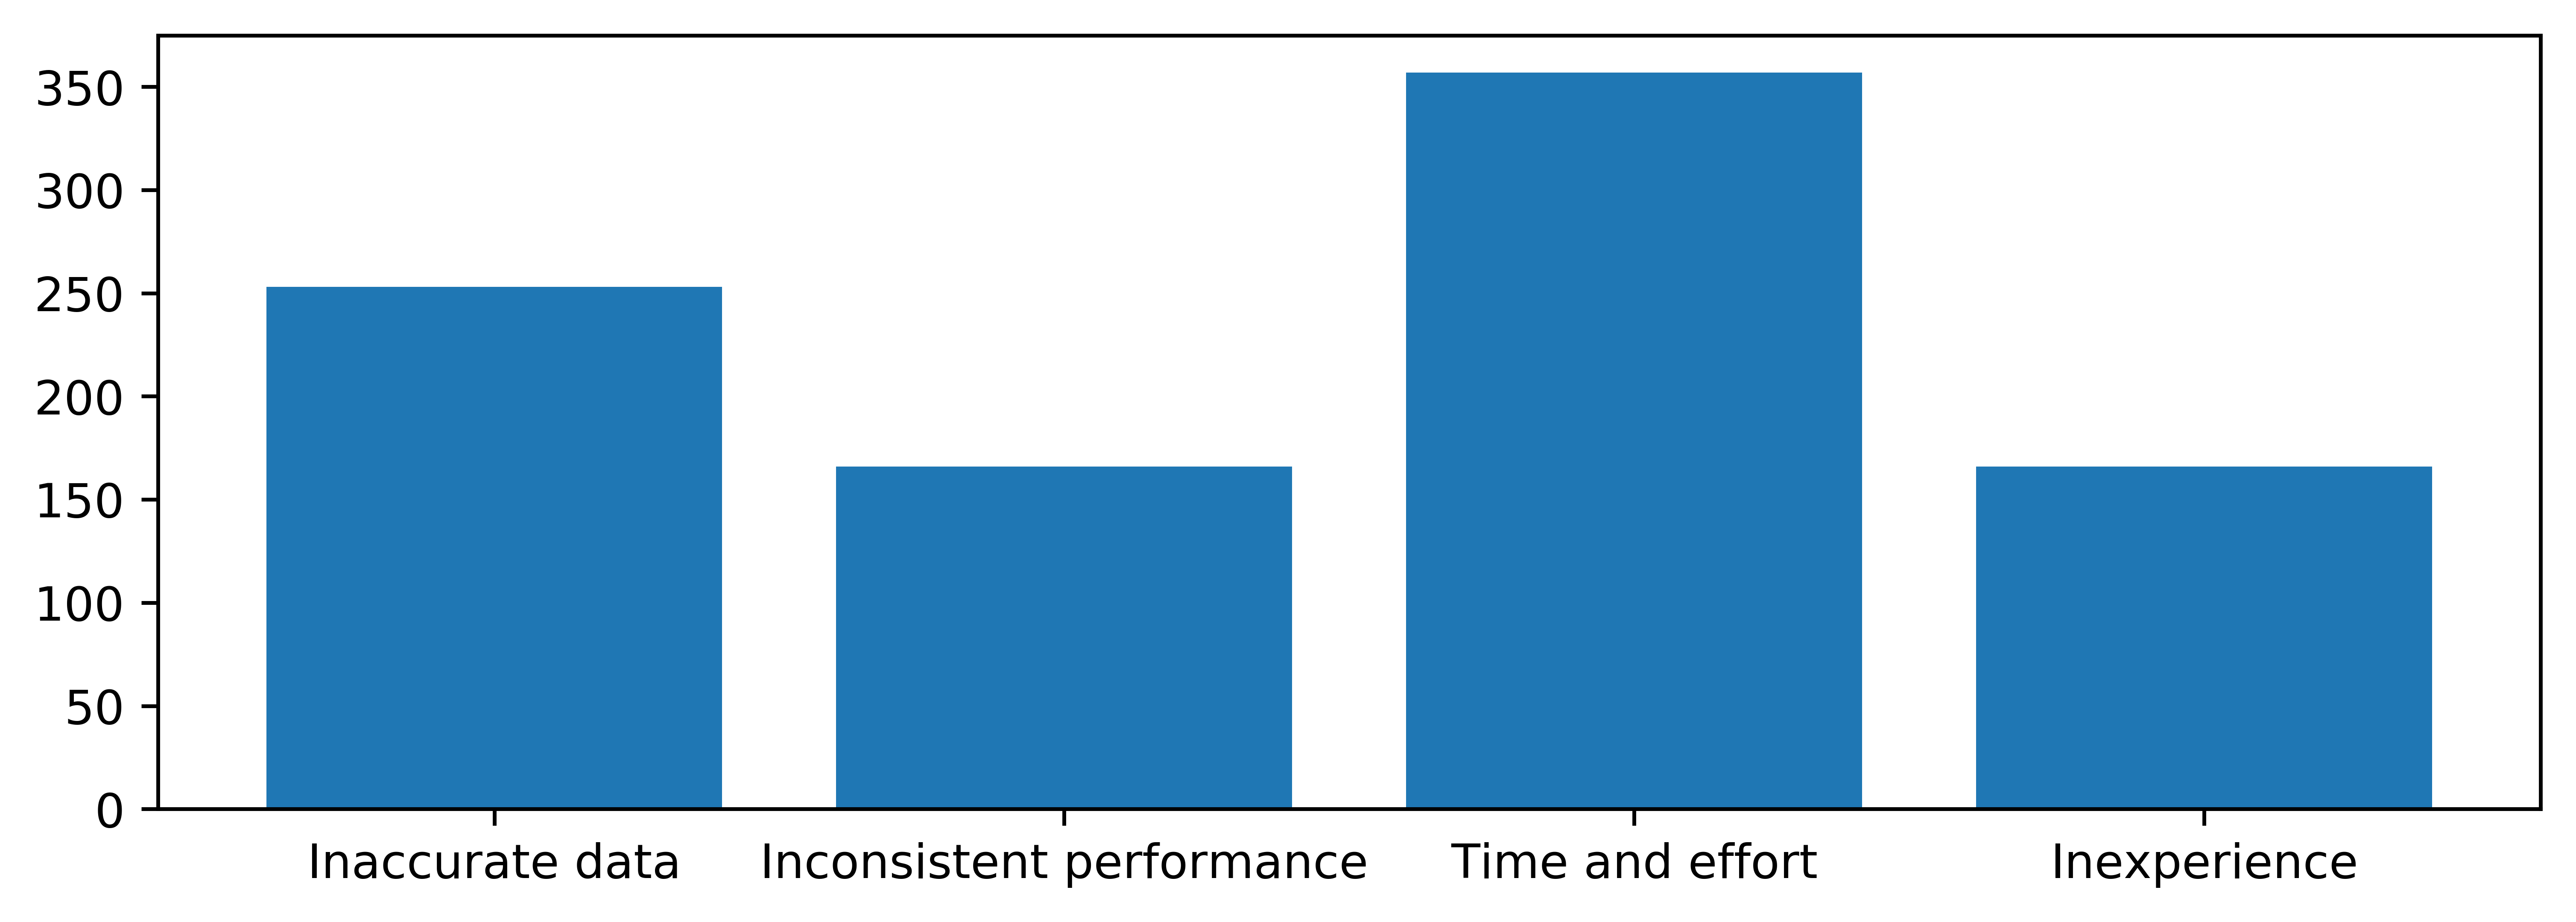

In [32]:
# creating a data frame 

df  = pd.DataFrame()
df["1"] = Q18_1
df["2"] = Q18_2
df["3"] = Q18_3
df["4"] = Q18_4

df

# plotting the bar graph 

r = np.arange(4)
bar = df.iloc[1]
plt.figure(figsize = (9,3), dpi = 800)
plt.bar(r,bar)
cols = ["Inaccurate data", "Inconsistent performance", "Time and effort", "Inexperience"]
plt.xticks([0, 1, 2, 3], cols)

### Q17. Usefullness of simulation in decision-making process

In [97]:
Q17_1 = data["Q17.1"].value_counts().sort_index()
Q17_2 = data["Q17.2"].value_counts().sort_index() 
Q17_3 = data["Q17.3"].value_counts().sort_index() 
Q17_4 = data["Q17.4"].value_counts().sort_index() 
Q17_5 = data["Q17.5"].value_counts().sort_index()
Q17_6 = data["Q17.6"].value_counts().sort_index() 
Q17_7 = data["Q17.7"].value_counts().sort_index()

In [98]:
cols = ["Identify Problems", "Discuss Scope", "Gather Information", "Generate Alternatives", "Get Feedback", "Validate Alternatives", "Evaluate Decisions"]

In [99]:
df  = pd.DataFrame()
df["1"] = Q17_1
df["2"] = Q17_2
df["3"] = Q17_3
df["4"] = Q17_4
df["5"] = Q17_5
df["6"] = Q17_6
df["7"] = Q17_7

([<matplotlib.axis.XTick at 0x1a179ee1d0>,
 <a list of 7 Text xticklabel objects>)

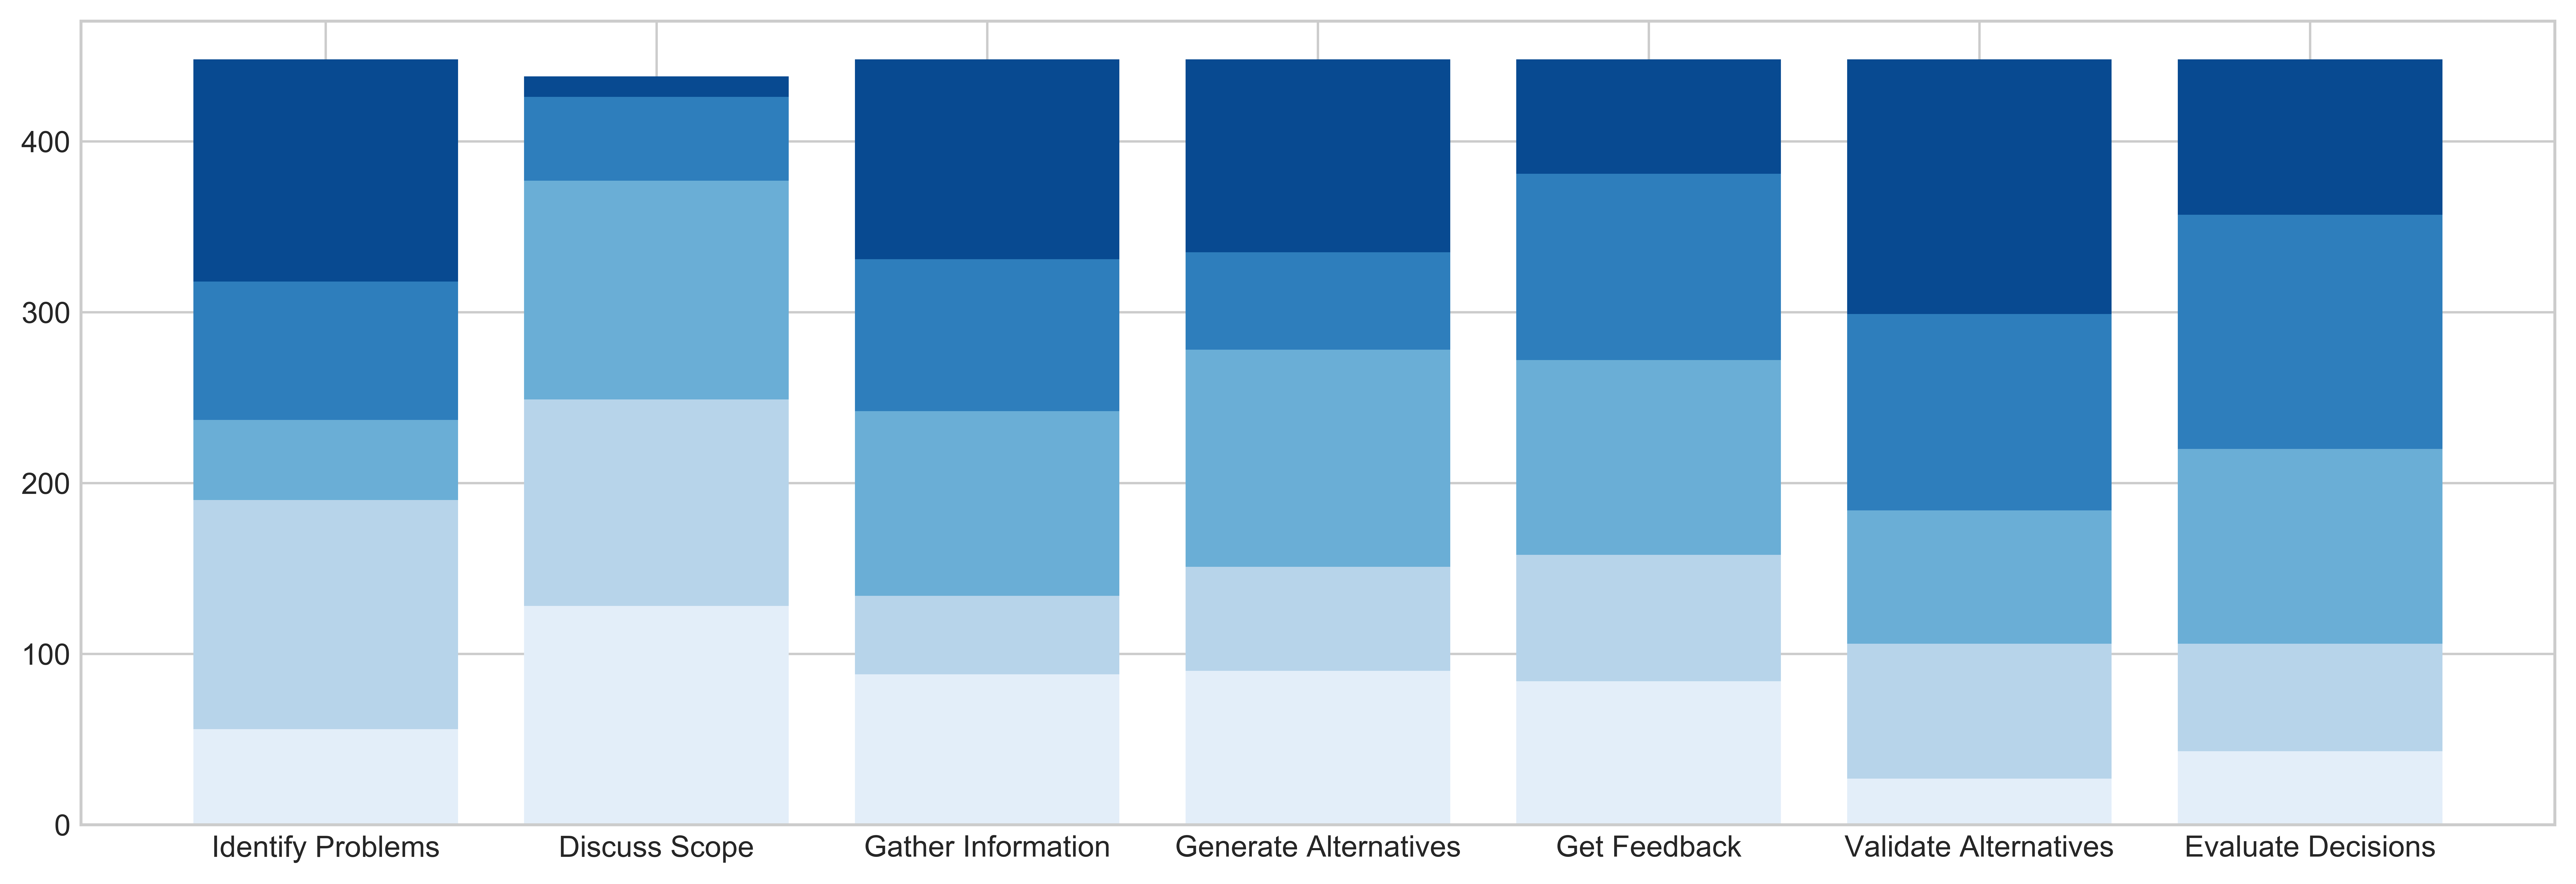

In [100]:
r = np.arange(7)
b = df.iloc[0]
c = df.iloc[1]
d = df.iloc[2]
e = df.iloc[3]
f = df.iloc[4]

plt.figure(figsize = (15,5), dpi = 800)
cmap = plt.get_cmap('Blues')
plt.bar(r,b, color = cmap(0.1))
plt.bar(r,c, bottom = b, color = cmap(0.3))
plt.bar(r,d, bottom = b+c, color = cmap(0.5))
plt.bar(r,e, bottom = b+c+d, color = cmap(0.7))
plt.bar(r,f, bottom = b+c+d+e, color = cmap(0.9))

plt.xticks([0, 1, 2, 3, 4, 5, 6], cols)

([<matplotlib.axis.XTick at 0x1a18d3d2b0>,
 <a list of 7 Text xticklabel objects>)

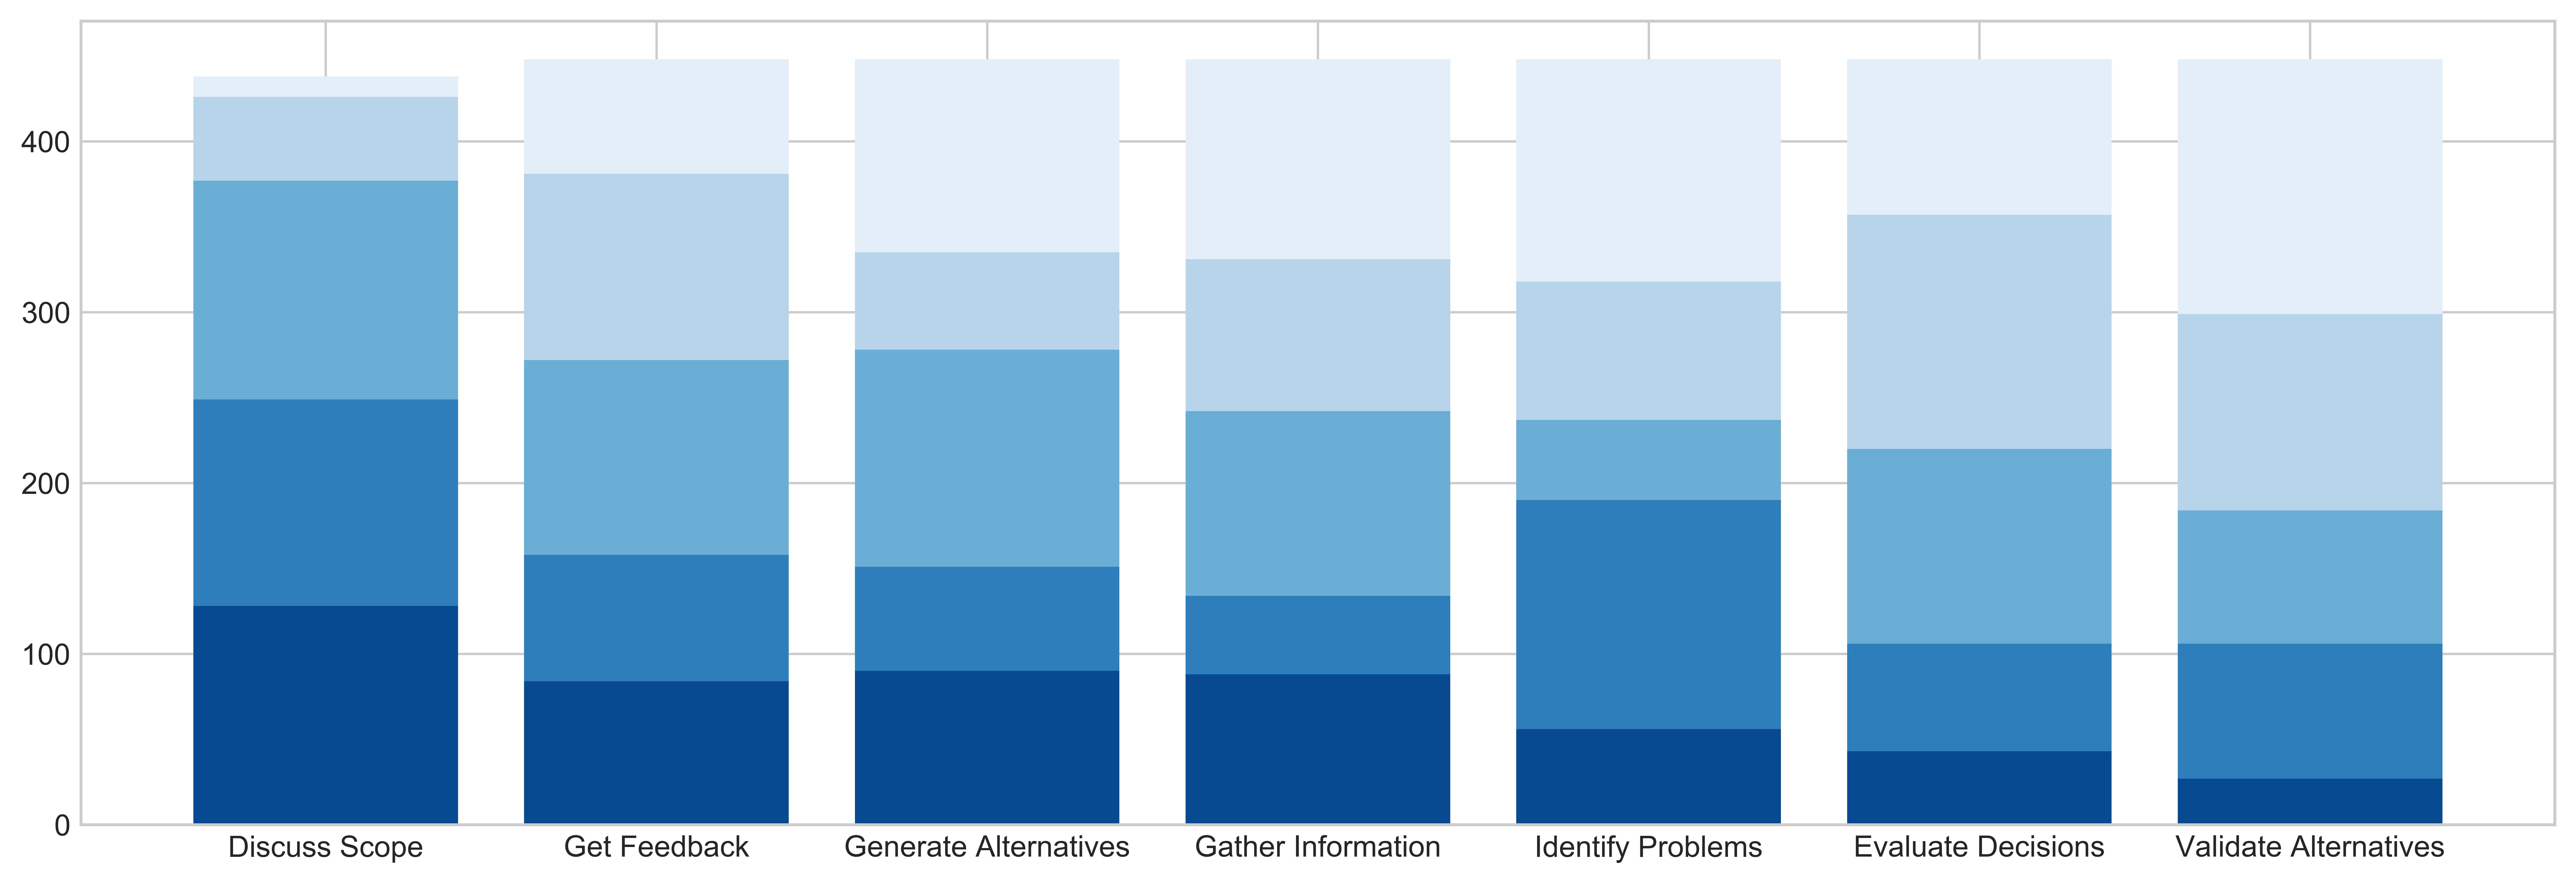

In [109]:
df1 = df[["2","5","4","3","1","7","6"]]

r = np.arange(7)
b = df1.iloc[0]
c = df1.iloc[1]
d = df1.iloc[2]
e = df1.iloc[3]
f = df1.iloc[4]

cols = ["Discuss Scope", "Get Feedback", "Generate Alternatives", "Gather Information", "Identify Problems", "Evaluate Decisions", "Validate Alternatives"]

plt.figure(figsize = (15,5), dpi = 800)
cmap = plt.get_cmap('Blues')
plt.bar(r,b, color = cmap(0.9))
plt.bar(r,c, bottom = b, color = cmap(0.7))
plt.bar(r,d, bottom = b+c, color = cmap(0.5))
plt.bar(r,e, bottom = b+c+d, color = cmap(0.3))
plt.bar(r,f, bottom = b+c+d+e, color = cmap(0.1))

plt.xticks([0, 1, 2, 3, 4, 5, 6], cols)

In [104]:
df1

,6,1,3,4,7,5,2
1,27,56,88,90,43,84,128
2,79,134,46,61,63,74,121
3,78,47,108,127,114,114,128
4,115,81,89,57,137,109,49
5,149,130,117,113,91,67,12


### Q13. Improvement Criteria for Data Analytics

In [16]:

# summing up binomials 

Q13_1 = data["Q13.1"].value_counts().sort_index()
Q13_2 = data["Q13.2"].value_counts().sort_index()
Q13_3 = data["Q13.3"].value_counts().sort_index()
Q13_4 = data["Q13.4"].value_counts().sort_index()
Q13_5 = data["Q13.5"].value_counts().sort_index()
Q13_6 = data["Q13.6"].value_counts().sort_index()
Q13_7 = data["Q13.7"].value_counts().sort_index()
Q13_8 = data["Q13.8"].value_counts().sort_index()
Q13_9 = data["Q13.9"].value_counts().sort_index()
Q13_10 = data["Q13.10"].value_counts().sort_index()

print(Q13_1)
print(Q13_2)
print(Q13_3)
print(Q13_4) 
print(Q13_5)
print(Q13_6)
print(Q13_7)
print(Q13_8)
print(Q13_9) 
print(Q13_10)


1    186
2    172
3     85
4      5
Name: Q13.1, dtype: int64
1    130
2    225
3     77
4      8
5      8
Name: Q13.2, dtype: int64
1     39
2    196
3    193
4      8
5     12
Name: Q13.3, dtype: int64
1     66
2    222
3    131
4     29
Name: Q13.4, dtype: int64
1     68
2    146
3    220
4     14
Name: Q13.5, dtype: int64
1     28
2    149
3    218
4     53
Name: Q13.6, dtype: int64
1     78
2    140
3    178
4     52
Name: Q13.7, dtype: int64
1    185
2    139
3    124
Name: Q13.8, dtype: int64
1    125
2    182
3    120
4     21
Name: Q13.9, dtype: int64
1    166
2    143
3    110
4     29
Name: Q13.10, dtype: int64


In [22]:
Q13_1 = data["Q13.1"].value_counts().sort_index()
Q13_2 = data["Q13.2"].value_counts().sort_index() 
Q13_3 = data["Q13.3"].value_counts().sort_index() 
Q13_4 = data["Q13.4"].value_counts().sort_index() 
Q13_5 = data["Q13.5"].value_counts().sort_index()
Q13_6 = data["Q13.6"].value_counts().sort_index() 
Q13_7 = data["Q13.7"].value_counts().sort_index()
Q13_8 = data["Q13.5"].value_counts().sort_index()
Q13_9 = data["Q13.6"].value_counts().sort_index() 
Q13_10 = data["Q13.7"].value_counts().sort_index()

cols = ["Interpretation", "Informative", "Integrative", "Comparisons", "Transparency", "Easy to learn", "Visualization", "Interactive", "Navigations", "Evaluations"]

df  = pd.DataFrame()
df["1"] = Q13_1
df["2"] = Q13_2
df["3"] = Q13_3
df["4"] = Q13_4
df["5"] = Q13_5
df["6"] = Q13_6
df["7"] = Q13_7
df["8"] = Q13_8
df["9"] = Q13_9
df["10"] = Q13_10


In [23]:
df


,1,2,3,4,5,6,7,8,9,10
1,186,130,39,66,68,28,78,68,28,78
2,172,225,196,222,146,149,140,146,149,140
3,85,77,193,131,220,218,178,220,218,178
4,5,8,8,29,14,53,52,14,53,52


In [43]:
((186*1)+(172*2)+(85*3)+(5*4))/(186+172+85+5)

1.796875

In [44]:
((130*1)+(225*2)+(77*3)+(8*4))/(130+225+77+8)

1.915909090909091

In [45]:
((39*1)+(39+196+193+8

436

In [42]:
g = df.groupby(["1"]).mean()
g
h = df.loc[:,"1"]
h





1    186
2    172
3     85
4      5
Name: 1, dtype: int64

([<matplotlib.axis.XTick at 0x109d74cf8>,
 <a list of 10 Text xticklabel objects>)

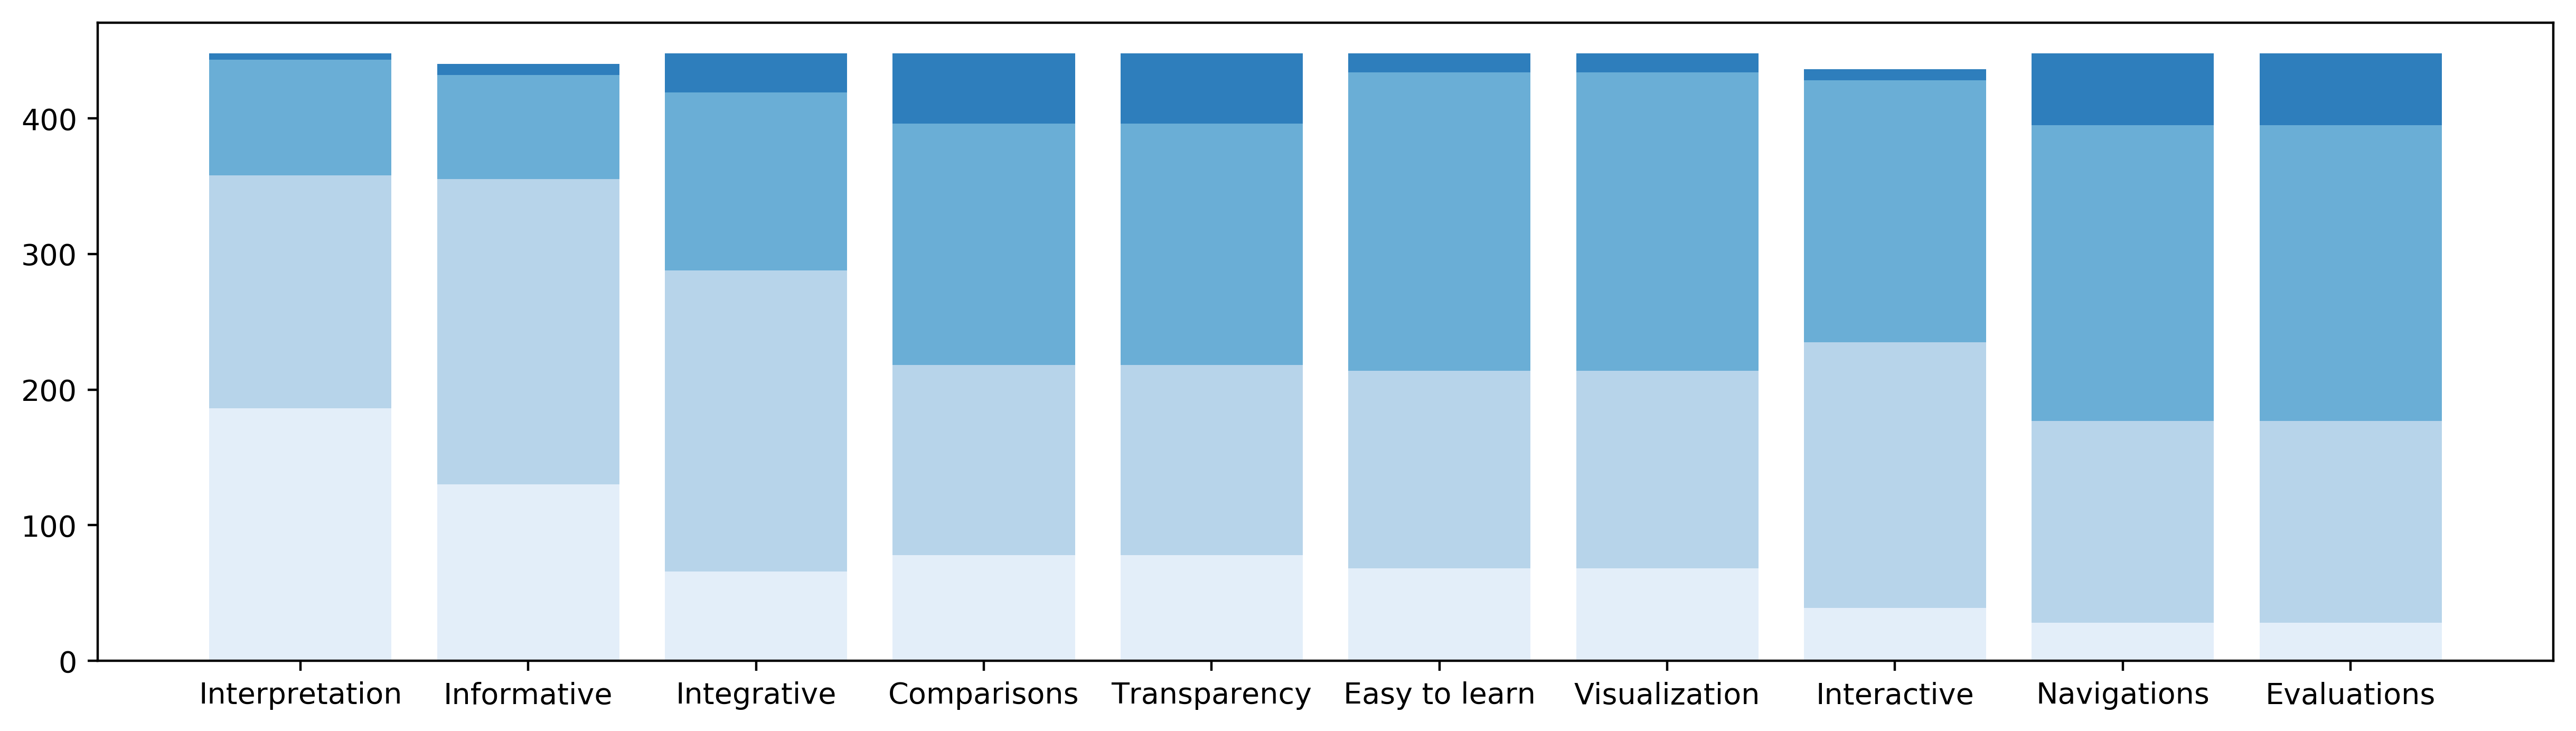

In [24]:
df1 = df[["1","2","4","7","10","5","8","3","6","9"]]

r = np.arange(10)
b = df1.iloc[0]
c = df1.iloc[1]
d = df1.iloc[2]
e = df1.iloc[3]


plt.figure(figsize = (15,4), dpi = 400)
cmap = plt.get_cmap('Blues')
plt.bar(r,b, color = cmap(0.1))
plt.bar(r,c, bottom = b, color = cmap(0.3))
plt.bar(r,d, bottom = b+c, color = cmap(0.5))
plt.bar(r,e, bottom = b+c+d, color = cmap(0.7))

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], cols)

### Q19. Improvement Criteria for Simulation

In [18]:
Q19_1 = data["Q19.1"].value_counts().sort_index()
Q19_2 = data["Q19.2"].value_counts().sort_index() 
Q19_3 = data["Q19.3"].value_counts().sort_index() 
Q19_4 = data["Q19.4"].value_counts().sort_index() 
Q19_5 = data["Q19.5"].value_counts().sort_index()
Q19_6 = data["Q19.6"].value_counts().sort_index() 
Q19_7 = data["Q19.7"].value_counts().sort_index()
Q19_8 = data["Q19.5"].value_counts().sort_index()
Q19_9 = data["Q19.6"].value_counts().sort_index() 
Q19_10 = data["Q19.7"].value_counts().sort_index()

cols = ["Accuracy", "Uncertainty", "Simple input", "Graphics", "Error checking", "Awareness","Interoperability", "Scalability", "Model resolution", "Results analysis"]

df  = pd.DataFrame()
df["1"] = Q19_1
df["2"] = Q19_2
df["3"] = Q19_3
df["4"] = Q19_4
df["5"] = Q19_5
df["6"] = Q19_6
df["7"] = Q19_7
df["8"] = Q19_8
df["9"] = Q19_9
df["10"] = Q19_10

In [19]:
df

,1,2,3,4,5,6,7,8,9,10
1,126,134.0,253.0,82.0,57,104,117,57,104,117
2,161,198.0,147.0,269.0,78,185,95,78,185,95
3,132,106.0,40.0,81.0,236,127,167,236,127,167
4,21,NaN,NaN,NaN,62,25,44,62,25,44
5,8,10.0,8.0,16.0,15,7,25,15,7,25


In [20]:
df1 = df[["3","4","2","1","9","6","7","10","5","8"]]

([<matplotlib.axis.XTick at 0x10a0865c0>,
 <a list of 10 Text xticklabel objects>)

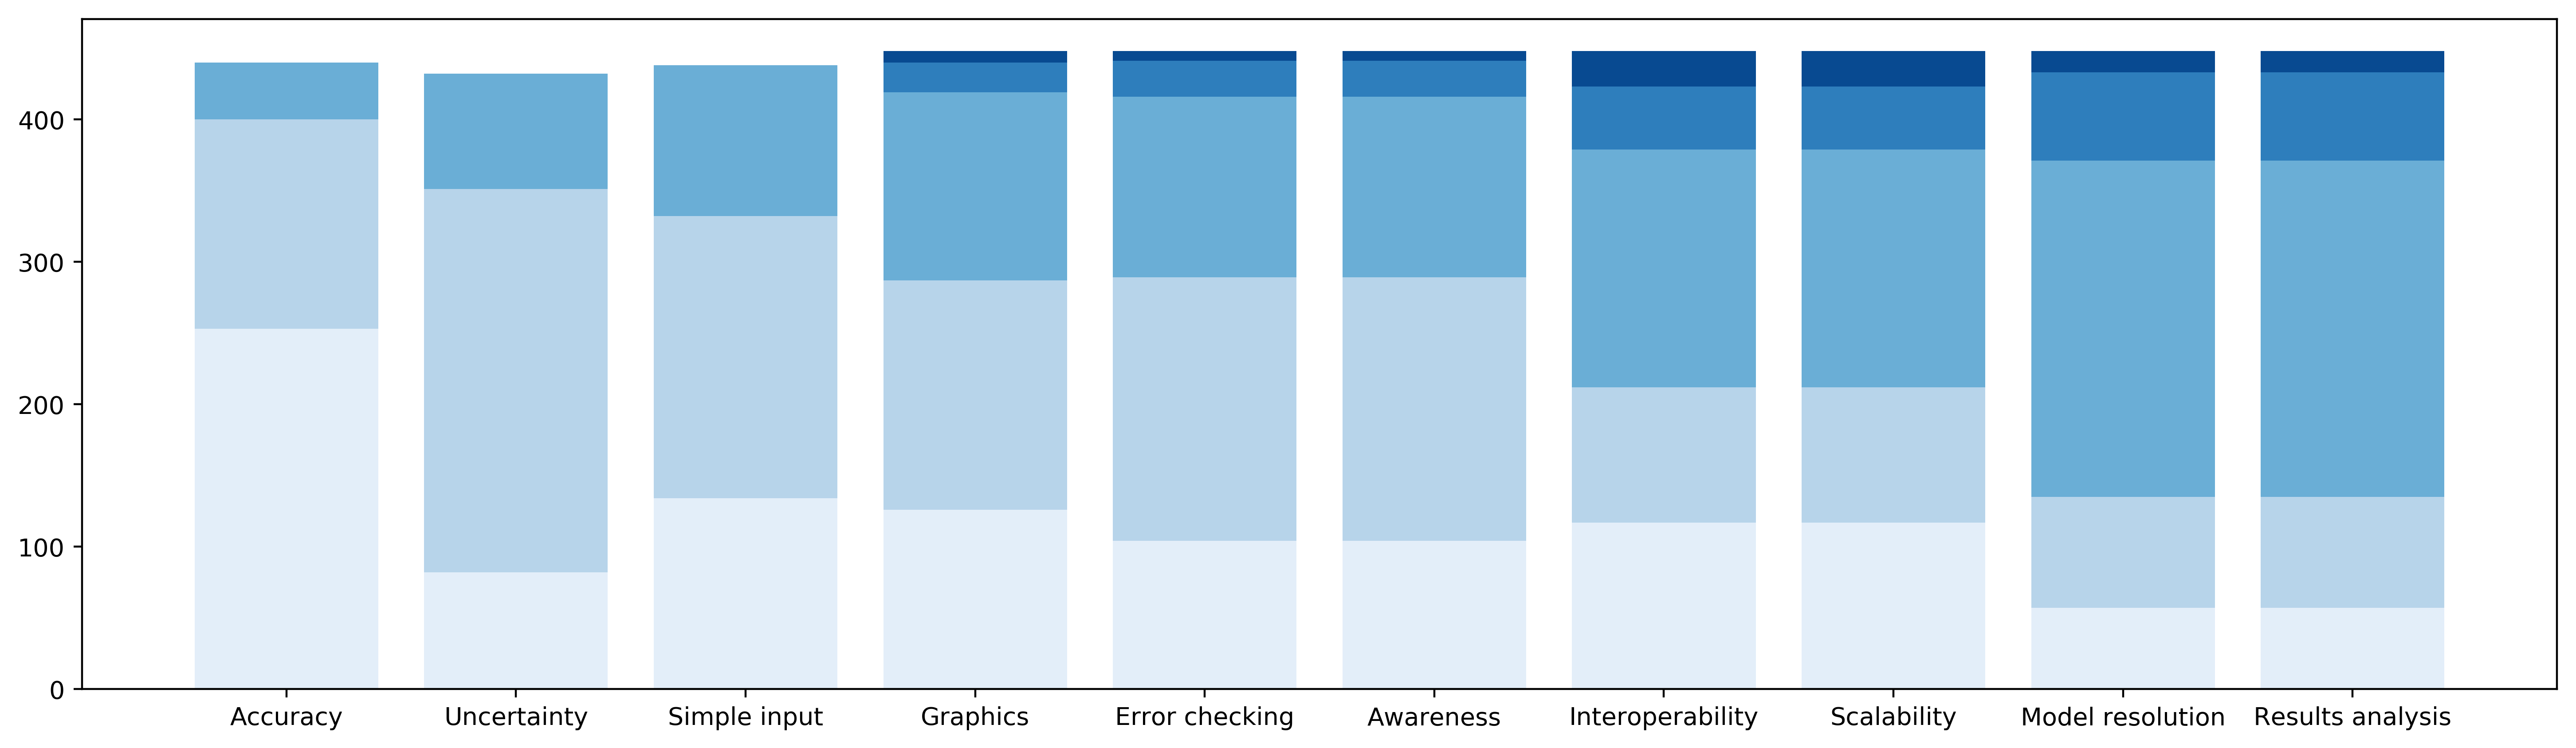

In [21]:
r = np.arange(10)
b = df1.iloc[0]
c = df1.iloc[1]
d = df1.iloc[2]
e = df1.iloc[3]
f = df1.iloc[4]

plt.figure(figsize = (18,5), dpi = 400)
cmap = plt.get_cmap('Blues')
plt.bar(r,b, color = cmap(0.1))
plt.bar(r,c, bottom = b, color = cmap(0.3))
plt.bar(r,d, bottom = b+c, color = cmap(0.5))
plt.bar(r,e, bottom = b+c+d, color = cmap(0.7))
plt.bar(r,f, bottom = b+c+d+e, color = cmap(0.9))


plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], cols)